# **Aula 4 - 28/08 - Pandas, Manipulação e Limpeza de Dados, Estatísticas Descritivas.



<p align="justify"> O Pandas é uma biblioteca Python amplamente utilizada para análise e manipulação de dados. Ela fornece estruturas de dados e funções que facilitam a manipulação, limpeza, agregação e análise de dados. Pandas é uma ferramenta essencial para qualquer pessoa que trabalhe com dados em Python.

<p align="justify"> Para começar a usar o Pandas, você deve importá-lo em seu ambiente Python, geralmente usando o seguinte comando:



In [1]:
import pandas as pd

## 1. Series



<p align="justify">  Em Pandas, uma Series é uma estrutura de dados unidimensional que se assemelha a uma coluna em uma planilha ou a um vetor em programação. Cada elemento em uma Series possui um rótulo associado, chamado de índice. Essa combinação de dados e índices torna as Series poderosas e flexíveis para trabalhar com dados em Python.

Aqui estão alguns pontos-chave sobre as Series em Pandas:


* Unidimensional: As Series são estruturas de dados unidimensionais, o que significa que elas contêm apenas uma sequência de dados. Enquanto os DataFrames, outra estrutura de dados Pandas, são bidimensionais, as Series são projetadas para armazenar dados unidimensionais, como uma coluna de valores.

* Índices: Cada elemento em uma Series tem um rótulo de índice exclusivo. Esses índices são automaticamente atribuídos às posições dos elementos na Series quando você a cria. Você também pode definir índices personalizados se desejar.

* Tipos de Dados: As Series podem conter dados de diversos tipos, como números inteiros, números de ponto flutuante, strings, datas e assim por diante. O Pandas permite que as Series armazenem dados heterogêneos, ou seja, dados de diferentes tipos em uma única Series.

* Operações de Vetorização: Uma das vantagens das Series é que elas suportam operações de vetorização. Isso significa que você pode aplicar operações diretamente a uma Series sem precisar de loops explícitos. Isso torna o código mais eficiente e legível.

* Acesso aos Dados: Você pode acessar os elementos de uma Series de várias maneiras, incluindo índices numéricos, índices de rótulos, fatiamento e seleção condicional. Isso facilita a recuperação de dados específicos ou a realização de operações neles.

* Nome da Série: Você pode atribuir um nome a uma Series, o que pode ser útil para documentação e referência. O nome é armazenado como um atributo da Series.



Para criar uma série em pandas, pode se fazer de forma parecida com os numpy arrays:

In [2]:
import pandas as pd

# Criando uma série a partir de uma lista

dados = [1,2,3,4,5]

serie = pd.Series(dados)

print(serie)
print(type(serie))

0    1
1    2
2    3
3    4
4    5
dtype: int64
<class 'pandas.core.series.Series'>


Veja que o valor impresso é diferente de uma lista ou de um numpy array: automaticamente são criados índices para cada elemento da serie. As Series são uma parte fundamental do Pandas e são frequentemente usadas em conjunto com DataFrames para realizar análises de dados e manipulações de dados mais detalhadas. Elas são versáteis e desempenham um papel crucial em muitas operações de análise de dados em Python. Se quiser definir o índice a ser utilizado (ao invés de um indice que começa do 0):


In [ ]:
dados2 = pd.Series([10,7,3,2,-15], # Lista de valores
                   index = ['Brasil', 'Japão', 'Coréia', 'México', 'EUA']) # Valores do índice

print(dados2)

Brasil    10
Japão      7
Coréia     3
México     2
EUA      -15
dtype: int64


De forma parecida com arrays do Numpy, você pode usar os labels para selecionar valores:

In [ ]:
dados2["Brasil"]

10

Ou uma lista de valores:

In [ ]:
dados2[['Brasil', 'México', 'EUA']]

Brasil    10
México     2
EUA      -15
dtype: int64

Você pode filtrar valores utilizando operações Booleanas:

In [ ]:
dados2[dados2 > 5]

Brasil    10
Japão      7
dtype: int64

Pode fazer operações matemáticas

In [ ]:
dados2 * 2

Brasil    20
Japão     14
Coréia     6
México     4
EUA      -30
dtype: int64

E assim por diante. Além disso, como ressalta Mckinney (2022), series de Pandas são parecidas também com dicionários. Você pode verificar se determinada "chave" (ou índice nesse contexto) está dentro de uma serie:

In [ ]:
"Brasil" in dados2

True

In [ ]:
"Argentina" in dados2

False

Se passar um dicionário para transformar em série, automaticamente o Pandas utilizará as chaves como índice

In [ ]:
dados_dict = {'Brasil': 10, 'Japão': 7, 'Coréia': 3, 'México':2, 'EUA': -15}

dados3 = pd.Series(dados_dict)

dados3


Brasil    10
Japão      7
Coréia     3
México     2
EUA      -15
dtype: int64

E pode transformar de volta em um dicionário utilizando o método ".to_dict()"


In [ ]:
dados_dict2 = dados3.to_dict()

print(dados_dict2)
print(type(dados_dict2))

{'Brasil': 10, 'Japão': 7, 'Coréia': 3, 'México': 2, 'EUA': -15}
<class 'dict'>


Quando existem valores *NA* (Ou *missing*), você pode usar o método isna() para identificá-los:

In [ ]:
import pandas as pd
import numpy as np

# Criando uma Series com índice de países
dados4 = {'Brasil': 210_000_000,
          'EUA': 328_000_000,
          'China': 1_409_000_000}

series2 = pd.Series(dados4)

# Definindo um valor ausente para um país
series2['Índia'] = np.nan

# Imprimindo a série
print(series2)

print(" ")
print("*****Missings******")


# Checando os ausentes
print(series2.isna())

Brasil    2.100000e+08
EUA       3.280000e+08
China     1.409000e+09
Índia              NaN
dtype: float64
 
*****Missings******
Brasil    False
EUA       False
China     False
Índia      True
dtype: bool


Por fim, se quiser pode nomear tanto os índices da série quanto seus valores:

In [ ]:
# Nomeando os valores

series2.name = 'PIB per capita'

# nomeando o índice

series2.index.name = 'Países'


print(series2)


Países
Brasil    2.100000e+08
EUA       3.280000e+08
China     1.409000e+09
Índia              NaN
Name: PIB per capita, dtype: float64


### Exercícios

Para os exercícios, sempre é bom consultar a documentação específica do Pandas sobre [Series](https://pandas.pydata.org/docs/reference/series.html)

1 - Filtragem com Series - Crie uma Series com números inteiros aleatórios. Em seguida, crie uma nova Series que contenha apenas os valores maiores que 50 da primeira Series.

In [3]:
# Criando uma Series com números inteiros aleatórios
data = [45, 60, 75, 30, 90, 55, 70]
series = pd.Series(data)

# Filtrando valores maiores que 50
filtrados = series[series > 50]

print("Série original:")
print(series)
print("\nValores maiores que 50:")
print(filtrados)

Série original:
0    45
1    60
2    75
3    30
4    90
5    55
6    70
dtype: int64

Valores maiores que 50:
1    60
2    75
4    90
5    55
6    70
dtype: int64


2 - Operações com Series - Primeiro, vamos criar duas Series com dados numéricos:

In [4]:
# Criando as duas Series
serie1 = pd.Series([10, 20, 30, 40, 50])
serie2 = pd.Series([5, 15, 25, 35, 45])

a) Some as duas Series

In [5]:
soma = serie1 + serie2
print("Soma das Series:")
print(soma)

Soma das Series:
0    15
1    35
2    55
3    75
4    95
dtype: int64


b) Multiplique as Series uma pela outra

In [6]:
mult = serie1 * serie2

print("Multplicação das Series: ")
print(mult)

Multplicação das Series: 
0      50
1     300
2     750
3    1400
4    2250
dtype: int64


c) Encontre o valor máximo nas duas Series

In [ ]:
print(serie1.max())
print(serie2.max())

50
45


d) Calcule a média dos valores nas duas séries:

In [ ]:
media_serie1 = serie1.mean()
media_serie2 = serie2.mean()

print("Média de Serie1:", media_serie1)
print("Média de Serie2:", media_serie2)

Média de Serie1: 30.0
Média de Serie2: 25.0


3 - Crie uma Series com nomes de cidades e seus respectivos números de habitantes (Não precisam ser dados reais). Classifique a Series em ordem decrescente com base no número de habitantes.

In [ ]:
# Criando uma Series com nomes de cidades e seus respectivos números de habitantes
data = {'Cidade A': 750000, 'Cidade B': 610000, 'Cidade C': 850000, 'Cidade D': 420000, 'Cidade E': 320000}
series = pd.Series(data)

# Classificando a Series em ordem decrescente com base no número de habitantes
series_ordenada = series.sort_values(ascending=False)

print("Série original:")
print(series)
print("\nSérie classificada em ordem decrescente:")
print(series_ordenada)

Série original:
Cidade A    750000
Cidade B    610000
Cidade C    850000
Cidade D    420000
Cidade E    320000
dtype: int64

Série classificada em ordem decrescente:
Cidade C    850000
Cidade A    750000
Cidade B    610000
Cidade D    420000
Cidade E    320000
dtype: int64


4 - Crie duas Series com dados de sua escolha. Concatene as duas Series em uma única Series. Certifique-se de que os índices sejam únicos após a concatenação.

In [ ]:
# Criando duas Series com dados de sua escolha
serie1 = pd.Series([1, 2, 3], index=['A', 'B', 'C'])
serie2 = pd.Series([4, 5, 6], index=['D', 'E', 'F'])

# Concatenando as duas Series em uma única Series
serie_concatenada = pd.concat([serie1, serie2])

print("Primeira Series:")
print(serie1)
print("\nSegunda Series:")
print(serie2)
print("\nSeries Concatenada:")
print(serie_concatenada)

Primeira Series:
A    1
B    2
C    3
dtype: int64

Segunda Series:
D    4
E    5
F    6
dtype: int64

Series Concatenada:
A    1
B    2
C    3
D    4
E    5
F    6
dtype: int64


5 - No seguinte dicionário estão duas informações: O nome de políticos e a quantidade de tweets que fizeram sobre as vacinas de Covid-19 no período de 2020 a 2021. Converta esse dicionário em uma série e dê as seguintes informações: Qual a média de tweets, o desvio padrão e quem tweetou mais.

In [7]:
import random

# Criando o dicionário com políticos e números de tweets
politicos = {
    "Politico1": random.randint(0, 500),
    "Politico2": random.randint(0, 500),
    "Politico3": random.randint(0, 500),
    "Politico4": random.randint(0, 500),
    "Politico5": random.randint(0, 500),
    "Politico6": random.randint(0, 500),
    "Politico7": random.randint(0, 500),
    "Politico8": random.randint(0, 500),
    "Politico9": random.randint(0, 500),
    "Politico10": random.randint(0, 500),
    "Politico11": random.randint(0, 500),
    "Politico12": random.randint(0, 500),
    "Politico13": random.randint(0, 500),
    "Politico14": random.randint(0, 500),
    "Politico15": random.randint(0, 500),
    "Politico16": random.randint(0, 500),
    "Politico17": random.randint(0, 500),
    "Politico18": random.randint(0, 500),
    "Politico19": random.randint(0, 500),
    "Politico20": random.randint(0, 500)
}

# Convertendo o dicionário em uma Series
serie_politicos = pd.Series(politicos)

# Calculando a média de tweets
media_tweets = serie_politicos.mean()

# Calculando o desvio padrão dos tweets
desvio_padrao_tweets = serie_politicos.std()

# Encontrando o político que tweetou mais
politico_mais_tweets = serie_politicos.idxmax()

print("Série de Políticos e Números de Tweets:")
print(serie_politicos)
print("\nMédia de Tweets:", media_tweets)
print("Desvio Padrão dos Tweets:", desvio_padrao_tweets)
print("Político que Tweetou Mais:", politico_mais_tweets, "com", serie_politicos[politico_mais_tweets], "tweets.")







Série de Políticos e Números de Tweets:
Politico1     304
Politico2     468
Politico3     451
Politico4     166
Politico5     328
Politico6     270
Politico7     431
Politico8     271
Politico9     182
Politico10    477
Politico11    500
Politico12    212
Politico13    327
Politico14    149
Politico15     29
Politico16    376
Politico17    158
Politico18    446
Politico19    281
Politico20    397
dtype: int64

Média de Tweets: 311.15
Desvio Padrão dos Tweets: 132.42486449621956
Político que Tweetou Mais: Politico11 com 500 tweets.


6 - Faça uma função que recebe um dicionário como argumento e retorne esse dicionário como série, junto de informações descritivas como média, moda, mediana.

In [ ]:
def analisar_dicionario(dic):
    # Convertendo o dicionário em uma Series
    serie = pd.Series(dic)

    # Calculando as estatísticas descritivas
    media = serie.mean()
    moda = serie.mode().to_list()  # Pode haver mais de uma moda
    mediana = serie.median()

    # Criando um dicionário com as informações
    informacoes = {
        "Serie": serie,
        "Média": media,
        "Moda": moda,
        "Mediana": mediana
    }

    return informacoes

# Exemplo de uso da função com um dicionário fictício
dicionario_exemplo = {
    "A": 10,
    "B": 20,
    "C": 30,
    "D": 20,
    "E": 10
}

resultado = analisar_dicionario(dicionario_exemplo)
print("Informações Descritivas:")
for chave, valor in resultado.items():
    if chave == "Serie":
        print(f"{chave}:\n{valor}\n")
    else:
        print(f"{chave}: {valor}")

## 2. Dataframes

Um DataFrame é uma estrutura de dados bidimensional, tabular e flexível amplamente usada na biblioteca Pandas do Python para armazenar e manipular dados de forma semelhante a uma planilha ou tabela em um banco de dados. Ele é composto por linhas e colunas, onde cada coluna pode conter dados de diferentes tipos, como números inteiros, números de ponto flutuante, strings, datas, entre outros.

Aqui estão algumas características e conceitos importantes relacionados a DataFrames:

* Bidimensional: DataFrames são bidimensionais, o que significa que eles têm duas dimensões: linhas e colunas. Cada linha representa um registro ou entrada de dados, enquanto cada coluna representa uma variável ou atributo específico.

* Estrutura Tabular: Os dados em um DataFrame são organizados em uma estrutura tabular semelhante a uma planilha. As colunas são nomeadas e as linhas são numeradas, permitindo fácil indexação e identificação dos dados.

* Tipos de Dados Heterogêneos: Diferentemente das estruturas de arrays NumPy, em que todos os elementos devem ser do mesmo tipo de dados, DataFrames do Pandas permitem que cada coluna contenha dados de tipos diferentes. Isso é particularmente útil para lidar com conjuntos de dados do mundo real, onde os tipos de dados variam.

* Rótulos de Linha e Coluna: Os DataFrames têm rótulos de linha (índices) e rótulos de coluna. Os rótulos de linha são usados para identificar as entradas de dados, enquanto os rótulos de coluna são usados para nomear as variáveis ou atributos.

* Operações de Dados: Os DataFrames oferecem uma ampla gama de funcionalidades para realizar operações de manipulação de dados, como filtragem, seleção, ordenação, agregação e cálculos estatísticos.

* Integração com Pandas: Os DataFrames são a estrutura de dados central na biblioteca Pandas, o que os torna altamente compatíveis com outras funcionalidades do Pandas, como leitura e escrita de dados em diferentes formatos, manipulação de datas e horas, e visualização de dados.

* Origem de Dados Diversificada: DataFrames podem ser criados a partir de várias fontes de dados, como arquivos CSV, bancos de dados SQL, dicionários Python e muito mais. Eles também podem ser exportados para diversos formatos, tornando-os ideais para análise de dados e ciência de dados.

Em resumo, um DataFrame é uma estrutura de dados extremamente versátil e poderosa no Pandas, projetada para lidar com uma ampla variedade de tarefas de manipulação e análise de dados. É uma escolha popular para qualquer pessoa que trabalhe com dados em Python devido à sua flexibilidade e eficiência.

Para criar um dataframe, você pode utilizar um dicionário com listas aninhadas:

In [ ]:
# Criando uma lista de dicionários com dados fictícios
dados = [
    {'Nome': 'Alice', 'Idade': 25, 'Cidade': 'São Paulo'},
    {'Nome': 'João', 'Idade': 30, 'Cidade': 'Rio de Janeiro'},
    {'Nome': 'Carol', 'Idade': 22, 'Cidade': 'Belo Horizonte'},
    {'Nome': 'David', 'Idade': 35, 'Cidade': 'São Paulo'},
]

# Criando um DataFrame a partir da lista de dicionários
df = pd.DataFrame(dados)

# Exibindo o DataFrame
print(df)

    Nome  Idade          Cidade
0  Alice     25       São Paulo
1   João     30  Rio de Janeiro
2  Carol     22  Belo Horizonte
3  David     35       São Paulo


Nem sempre você vai querer imprimir todo o banco. Digamos que você queira só entender mais ou menos o formato do banco. No exemplo a seguir temos um dataframe com 20 observações:

In [ ]:
# Criando dados fictícios para o DataFrame
dados = {
    "Nome": ["Pessoa" + str(i) for i in range(1, 21)], # usando list comprehension para gerar um índice de 1 a 21 e somar à "Pessoa"
    "Idade": [random.randint(18, 65) for _ in range(20)], # usando list comprehension para gerar números aleatórios no intervalo de 18 a 65 para 20 observações
    "Cidade": ["Cidade" + str(random.randint(1, 5)) for _ in range(20)]  # usando list comprehension para gerar um índice de 1 a 5 e somar à "Cidade"
}

# Criando o DataFrame
df = pd.DataFrame(dados)

# Exibindo o DataFrame
print(df)

        Nome  Idade   Cidade
0    Pessoa1     18  Cidade3
1    Pessoa2     55  Cidade3
2    Pessoa3     61  Cidade4
3    Pessoa4     19  Cidade4
4    Pessoa5     20  Cidade2
5    Pessoa6     64  Cidade3
6    Pessoa7     38  Cidade2
7    Pessoa8     49  Cidade4
8    Pessoa9     58  Cidade3
9   Pessoa10     53  Cidade4
10  Pessoa11     43  Cidade4
11  Pessoa12     44  Cidade5
12  Pessoa13     34  Cidade1
13  Pessoa14     48  Cidade3
14  Pessoa15     19  Cidade1
15  Pessoa16     64  Cidade3
16  Pessoa17     44  Cidade4
17  Pessoa18     38  Cidade2
18  Pessoa19     29  Cidade3
19  Pessoa20     42  Cidade2


Se quiser, pode imprimir só os 5 primeiros valores utilizando "head", mostrando a "cabeça" do dataframe

In [ ]:
df.head()

Nome  Idade   Cidade
0  Pessoa1     18  Cidade3
1  Pessoa2     55  Cidade3
2  Pessoa3     61  Cidade4
3  Pessoa4     19  Cidade4
4  Pessoa5     20  Cidade2

Se quiser, pode estabelecer um valor para o head, definindo a quantidade de observações a serem imprimidas. Se eu quiser ver apenas os dois primeiros valores

In [ ]:
df.head(2)

Nome  Idade   Cidade
0  Pessoa1     18  Cidade3
1  Pessoa2     55  Cidade3

De forma inversa, pode também imprimir os últimos 5 valores utilizando "tail", o "rabo" do dataframe:

In [ ]:
df.tail()

Nome  Idade   Cidade
15  Pessoa16     64  Cidade3
16  Pessoa17     44  Cidade4
17  Pessoa18     38  Cidade2
18  Pessoa19     29  Cidade3
19  Pessoa20     42  Cidade2

In [ ]:
# 2 últimos valores

df.tail(2)

Nome  Idade   Cidade
18  Pessoa19     29  Cidade3
19  Pessoa20     42  Cidade2

Pode mudar a ordem das colunas utilizando a opção "columns" na hora de criar um dataframe:

In [ ]:
df = pd.DataFrame(dados, columns=['Cidade', 'Nome','Idade'])

df

Cidade      Nome  Idade
0   Cidade3   Pessoa1     18
1   Cidade3   Pessoa2     55
2   Cidade4   Pessoa3     61
3   Cidade4   Pessoa4     19
4   Cidade2   Pessoa5     20
5   Cidade3   Pessoa6     64
6   Cidade2   Pessoa7     38
7   Cidade4   Pessoa8     49
8   Cidade3   Pessoa9     58
9   Cidade4  Pessoa10     53
10  Cidade4  Pessoa11     43
11  Cidade5  Pessoa12     44
12  Cidade1  Pessoa13     34
13  Cidade3  Pessoa14     48
14  Cidade1  Pessoa15     19
15  Cidade3  Pessoa16     64
16  Cidade4  Pessoa17     44
17  Cidade2  Pessoa18     38
18  Cidade3  Pessoa19     29
19  Cidade2  Pessoa20     42

Se inserir uma coluna que não tem valores no dicionário inicial, o Pandas automaticamente preencherá a coluna com valores *missing*:

In [ ]:
df = pd.DataFrame(dados, columns=['Cidade', 'Nome','Idade','Gênero'])

df

Cidade      Nome  Idade Gênero
0   Cidade3   Pessoa1     18    NaN
1   Cidade3   Pessoa2     55    NaN
2   Cidade4   Pessoa3     61    NaN
3   Cidade4   Pessoa4     19    NaN
4   Cidade2   Pessoa5     20    NaN
5   Cidade3   Pessoa6     64    NaN
6   Cidade2   Pessoa7     38    NaN
7   Cidade4   Pessoa8     49    NaN
8   Cidade3   Pessoa9     58    NaN
9   Cidade4  Pessoa10     53    NaN
10  Cidade4  Pessoa11     43    NaN
11  Cidade5  Pessoa12     44    NaN
12  Cidade1  Pessoa13     34    NaN
13  Cidade3  Pessoa14     48    NaN
14  Cidade1  Pessoa15     19    NaN
15  Cidade3  Pessoa16     64    NaN
16  Cidade4  Pessoa17     44    NaN
17  Cidade2  Pessoa18     38    NaN
18  Cidade3  Pessoa19     29    NaN
19  Cidade2  Pessoa20     42    NaN

Por fim, toda coluna de um dataframe pode ser extraída na forma de uma Series:

In [ ]:
df['Cidade']

0     Cidade3
1     Cidade3
2     Cidade4
3     Cidade4
4     Cidade2
5     Cidade3
6     Cidade2
7     Cidade4
8     Cidade3
9     Cidade4
10    Cidade4
11    Cidade5
12    Cidade1
13    Cidade3
14    Cidade1
15    Cidade3
16    Cidade4
17    Cidade2
18    Cidade3
19    Cidade2
Name: Cidade, dtype: object

In [ ]:
print(type(df['Cidade']))

<class 'pandas.core.series.Series'>


Forma alternativa de extrair uma coluna:

In [ ]:
df.Cidade

0     Cidade3
1     Cidade3
2     Cidade4
3     Cidade4
4     Cidade2
5     Cidade3
6     Cidade2
7     Cidade4
8     Cidade3
9     Cidade4
10    Cidade4
11    Cidade5
12    Cidade1
13    Cidade3
14    Cidade1
15    Cidade3
16    Cidade4
17    Cidade2
18    Cidade3
19    Cidade2
Name: Cidade, dtype: object

Também pode imprimir as colunas presentes em um dataframe utilizando o atributo "columns":

In [ ]:
df.columns

Index(['Cidade', 'Nome', 'Idade', 'Gênero'], dtype='object')

O mesmo com os índices

In [ ]:
df.index

RangeIndex(start=0, stop=20, step=1)

#### Indexação, Seleção e Filtragem

A indexação, seleção e filtragem de dados são operações fundamentais ao trabalhar com Pandas para acessar informações específicas em DataFrames. Essas operações permitem que você extraia dados relevantes para análise e manipulação.


Você pode selecionar colunas e valores em dataframes de forma parecida com o que já vimos em listas, utilizandos índices (i.e. [indice] ou ['coluna']).

In [ ]:
df = pd.DataFrame(dados, columns=['Cidade', 'Nome','Idade'])

df

Cidade      Nome  Idade
0   Cidade3   Pessoa1     18
1   Cidade3   Pessoa2     55
2   Cidade4   Pessoa3     61
3   Cidade4   Pessoa4     19
4   Cidade2   Pessoa5     20
5   Cidade3   Pessoa6     64
6   Cidade2   Pessoa7     38
7   Cidade4   Pessoa8     49
8   Cidade3   Pessoa9     58
9   Cidade4  Pessoa10     53
10  Cidade4  Pessoa11     43
11  Cidade5  Pessoa12     44
12  Cidade1  Pessoa13     34
13  Cidade3  Pessoa14     48
14  Cidade1  Pessoa15     19
15  Cidade3  Pessoa16     64
16  Cidade4  Pessoa17     44
17  Cidade2  Pessoa18     38
18  Cidade3  Pessoa19     29
19  Cidade2  Pessoa20     42

Selecionando a coluna de nomes

In [ ]:
df["Nome"]

0      Pessoa1
1      Pessoa2
2      Pessoa3
3      Pessoa4
4      Pessoa5
5      Pessoa6
6      Pessoa7
7      Pessoa8
8      Pessoa9
9     Pessoa10
10    Pessoa11
11    Pessoa12
12    Pessoa13
13    Pessoa14
14    Pessoa15
15    Pessoa16
16    Pessoa17
17    Pessoa18
18    Pessoa19
19    Pessoa20
Name: Nome, dtype: object

Selecionando nome e idade:

In [ ]:
df[['Nome', 'Idade']]

Nome  Idade
0    Pessoa1     18
1    Pessoa2     55
2    Pessoa3     61
3    Pessoa4     19
4    Pessoa5     20
5    Pessoa6     64
6    Pessoa7     38
7    Pessoa8     49
8    Pessoa9     58
9   Pessoa10     53
10  Pessoa11     43
11  Pessoa12     44
12  Pessoa13     34
13  Pessoa14     48
14  Pessoa15     19
15  Pessoa16     64
16  Pessoa17     44
17  Pessoa18     38
18  Pessoa19     29
19  Pessoa20     42

Pegando as duas primeiras linhas:

In [ ]:
df[0:2]

Cidade     Nome  Idade
0  Cidade3  Pessoa1     18
1  Cidade3  Pessoa2     55

Utilizando testes lógicos para filtrar observações

In [ ]:
df[df['Idade'] > 25]

Cidade      Nome  Idade
1   Cidade3   Pessoa2     55
2   Cidade4   Pessoa3     61
5   Cidade3   Pessoa6     64
6   Cidade2   Pessoa7     38
7   Cidade4   Pessoa8     49
8   Cidade3   Pessoa9     58
9   Cidade4  Pessoa10     53
10  Cidade4  Pessoa11     43
11  Cidade5  Pessoa12     44
12  Cidade1  Pessoa13     34
13  Cidade3  Pessoa14     48
15  Cidade3  Pessoa16     64
16  Cidade4  Pessoa17     44
17  Cidade2  Pessoa18     38
18  Cidade3  Pessoa19     29
19  Cidade2  Pessoa20     42

Você também pode utilizar testes lógicos em todo o banco de dados (apesar disto ser um pouco mais estranho):

In [ ]:
df == "São Paulo"

Cidade   Nome  Idade
0    False  False  False
1    False  False  False
2    False  False  False
3    False  False  False
4    False  False  False
5    False  False  False
6    False  False  False
7    False  False  False
8    False  False  False
9    False  False  False
10   False  False  False
11   False  False  False
12   False  False  False
13   False  False  False
14   False  False  False
15   False  False  False
16   False  False  False
17   False  False  False
18   False  False  False
19   False  False  False

##### Loc e Iloc

loc e iloc são dois atributos fundamentais para a indexação e seleção de dados em Pandas DataFrames e Series. Eles são usados para acessar elementos específicos com base em rótulos (para loc) ou índices inteiros (para iloc). Vamos explorar cada um deles em detalhes.

###### loc (localização):

* loc é usado para acessar dados com base em rótulos ou rótulos de índices, em vez de posições numéricas.
* Ele permite que você selecione dados com base em nomes de colunas ou rótulos de índices, usando uma sintaxe semelhante à da notação de dicionário.
* O primeiro argumento de loc é o rótulo das linhas que você deseja selecionar, e o segundo argumento é o rótulo das colunas (opcional).
* Pode ser usado para seleções condicionais e fatiamento baseado em rótulos.

In [ ]:
# Exemplo da documentação do loc

df = pd.DataFrame({
    "Animal": ['cobra', 'viper', 'sidewinder'],
    "Velocidade": [1,4,7],
    "Escudo": [2,5,8]
})

df


Animal  Velocidade  Escudo
0       cobra           1       2
1       viper           4       5
2  sidewinder           7       8

Para pegar um label só

In [ ]:
# Pegando a primeira observação

df.loc[0]

Animal        cobra
Velocidade        1
Escudo            2
Name: 0, dtype: object

Se fornecer uma lista de índices, o retorno da função será um dataframe:

In [ ]:
df.loc[[0, 1]]

Animal  Velocidade  Escudo
0  cobra           1       2
1  viper           4       5

Se o índice do dataframe fosse o nome dos animais, você poderia extrair diretamente utilizando o *label*:

In [ ]:
df = pd.DataFrame([[1, 2], [4, 5], [7, 8]],
     index=['cobra', 'viper', 'sidewinder'],
     columns=['max_speed', 'shield'])

df

max_speed  shield
cobra               1       2
viper               4       5
sidewinder          7       8

In [ ]:
df.loc['cobra']

max_speed    1
shield       2
Name: cobra, dtype: int64

In [ ]:
df.loc[['cobra','viper']]

max_speed  shield
cobra          1       2
viper          4       5

E assim por diante...

###### Iloc (indexação da localização)

* iloc é usado para acessar dados com base em posições numéricas de linhas e colunas, semelhante ao uso de índices em listas.
* Ele não considera rótulos, apenas índices inteiros.
* O primeiro argumento de iloc é o índice da linha que você deseja selecionar e  o segundo argumento é o índice da coluna (opcional).
* Pode ser usado para seleções condicionais e fatiamento baseado em índices inteiros.

In [ ]:
dados = {
    "Nome": ["Alice", "Bob", "Carol", "David", "Eva"],
    "Idade": [25, 30, 22, 35, 28],
    "Cidade": ["São Paulo", "Rio de Janeiro", "Belo Horizonte", "São Paulo", "Rio de Janeiro"]
}

df = pd.DataFrame(dados)

df

Nome  Idade          Cidade
0  Alice     25       São Paulo
1    Bob     30  Rio de Janeiro
2  Carol     22  Belo Horizonte
3  David     35       São Paulo
4    Eva     28  Rio de Janeiro

In [ ]:
# Selecionando a primeira linha
df.iloc[0]


Nome          Alice
Idade            25
Cidade    São Paulo
Name: 0, dtype: object

In [ ]:

# Selecionando a segunda célula (1,2)
df.iloc[0, 1]



25

In [ ]:
# Selecionando as três primeiras linhas e todas as colunas
df.iloc[:3, :]


Nome  Idade          Cidade
0  Alice     25       São Paulo
1    Bob     30  Rio de Janeiro
2  Carol     22  Belo Horizonte

##### Resumo

A tabela abaixo resume as principais opções de indexação e seleção com dataframes:

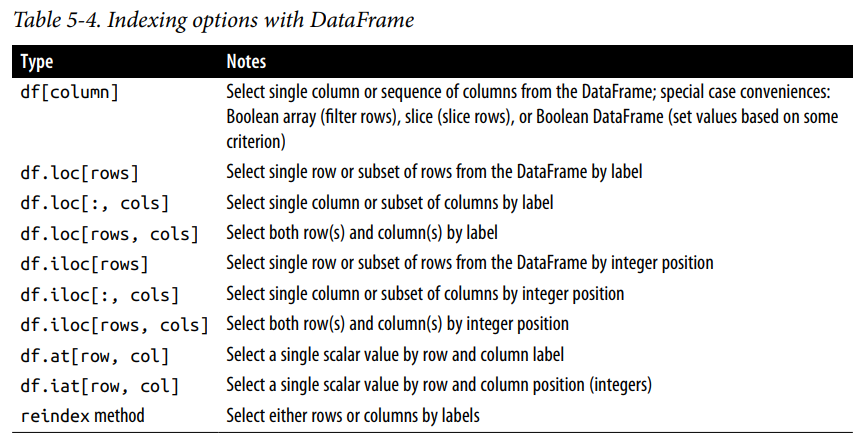

#### Operações em Colunas

Você pode modificar manualmente os valores de coluna atribuindo um valor para ela, como mostra o seguinte exemplo

In [ ]:
df = pd.DataFrame(dados, columns=['Cidade', 'Nome','Idade','Salário'])

df["Salário"] = 1000

df


Cidade   Nome  Idade  Salário
0       São Paulo  Alice     25     1000
1  Rio de Janeiro    Bob     30     1000
2  Belo Horizonte  Carol     22     1000
3       São Paulo  David     35     1000
4  Rio de Janeiro    Eva     28     1000

Você pode criar valores aleatórios e atribuir eles à coluna

In [ ]:
df['Salário'] = [random.randint(1000, 3000) for _ in range(5)] # usando list comprehension para gerar números aleatórios no intervalo de 1000 a 3000

df

Cidade   Nome  Idade  Salário
0       São Paulo  Alice     25     1964
1  Rio de Janeiro    Bob     30     2305
2  Belo Horizonte  Carol     22     1814
3       São Paulo  David     35     2986
4  Rio de Janeiro    Eva     28     1112

Desta mesma forma, também pode adicionar uma coluna vazia à um dataframe:

In [ ]:
df['Educação'] = np.NaN

df

Cidade   Nome  Idade  Salário  Educação
0       São Paulo  Alice     25     1964       NaN
1  Rio de Janeiro    Bob     30     2305       NaN
2  Belo Horizonte  Carol     22     1814       NaN
3       São Paulo  David     35     2986       NaN
4  Rio de Janeiro    Eva     28     1112       NaN

Pode criar uma coluna por meio de operações em outras colunas:

In [ ]:
# Calculando um aumento de 20% do salário

df['salário_+20%'] = df['Salário'] * 1.2

df

Cidade   Nome  Idade  Salário  Educação  salário_+20%
0       São Paulo  Alice     25     1964       NaN        2356.8
1  Rio de Janeiro    Bob     30     2305       NaN        2766.0
2  Belo Horizonte  Carol     22     1814       NaN        2176.8
3       São Paulo  David     35     2986       NaN        3583.2
4  Rio de Janeiro    Eva     28     1112       NaN        1334.4

Para deletar uma coluna, pode utilizar o método "del":

In [ ]:
del df['Educação']

df

Cidade   Nome  Idade  Salário  salário_+20%
0       São Paulo  Alice     25     1964        2356.8
1  Rio de Janeiro    Bob     30     2305        2766.0
2  Belo Horizonte  Carol     22     1814        2176.8
3       São Paulo  David     35     2986        3583.2
4  Rio de Janeiro    Eva     28     1112        1334.4

Também pode eliminar colunas utilizando o método "drop":

In [ ]:
df2 = df.drop(columns='Salário')

df2

Cidade   Nome  Idade  salário_+20%
0       São Paulo  Alice     25        2356.8
1  Rio de Janeiro    Bob     30        2766.0
2  Belo Horizonte  Carol     22        2176.8
3       São Paulo  David     35        3583.2
4  Rio de Janeiro    Eva     28        1334.4

Para eliminar observações, pode utilizar o método "drop" (mas é necessário criar outro objeto):

In [ ]:
df2 = df.drop(4)

df2

Cidade   Nome  Idade  Salário  salário_+20%
0       São Paulo  Alice     25     1964        2356.8
1  Rio de Janeiro    Bob     30     2305        2766.0
2  Belo Horizonte  Carol     22     1814        2176.8
3       São Paulo  David     35     2986        3583.2

Também pode tirar uma lista de valores:

In [ ]:
df3 = df2.drop([0,1])

df3

Cidade   Nome  Idade  Salário  salário_+20%
2  Belo Horizonte  Carol     22     1814        2176.8
3       São Paulo  David     35     2986        3583.2

#### Aplicando funções e utilizando o MAP

Você pode aplicar funções em dataframes da mesma forma que o Numpy. Você pode aplicar tanto no dataframe inteiro quanto em uma coluna específica.

In [ ]:
# Criando um dataframe só de números

dados = pd.DataFrame(np.random.standard_normal((4,3)),
                     columns = list("bde"),
                     index = ["São Paulo", "Rio de Janeiro", "Bahia", "Amazonas"])

dados

b         d         e
São Paulo      -0.383808 -1.239598  0.499179
Rio de Janeiro -1.088417 -0.299615 -0.316137
Bahia          -2.734952  0.262000  0.248584
Amazonas        1.615267 -0.030235 -0.820150

In [ ]:
# Usando o método abs() do numpy

np.abs(dados)

b         d         e
São Paulo       0.383808  1.239598  0.499179
Rio de Janeiro  1.088417  0.299615  0.316137
Bahia           2.734952  0.262000  0.248584
Amazonas        1.615267  0.030235  0.820150

In [ ]:
# Criando uma função e aplicando ela no dataframe

def quadrado(x):
  return x ** 2

dados.apply(quadrado)

b         d         e
São Paulo       0.147309  1.536603  0.249180
Rio de Janeiro  1.184651  0.089769  0.099943
Bahia           7.479961  0.068644  0.061794
Amazonas        2.609089  0.000914  0.672646

In [ ]:
# Aplicando em uma só coluna

dados['b'].apply(quadrado)

São Paulo         0.147309
Rio de Janeiro    1.184651
Bahia             7.479961
Amazonas          2.609089
Name: b, dtype: float64

#### Ordenando valores

Você pode ordenar valores no Pandas pelo Índice

In [ ]:
dados.sort_index() # Neste caso, vai ordernar por ordem alfabética

b         d         e
Amazonas        1.615267 -0.030235 -0.820150
Bahia          -2.734952  0.262000  0.248584
Rio de Janeiro -1.088417 -0.299615 -0.316137
São Paulo      -0.383808 -1.239598  0.499179

Ou pelas colunas

In [ ]:
# Novo banco

dados = pd.DataFrame(np.random.standard_normal((4,9)),
                     columns = list("fghabcxyz"),
                     index = ["São Paulo", "Rio de Janeiro", "Bahia", "Amazonas"])

dados

f         g         h         a         b         c  \
São Paulo       1.022577  1.492797  0.071414  0.029688  0.331256  0.443853   
Rio de Janeiro  1.439898 -1.129786  0.235635  0.217949  0.005071 -0.327253   
Bahia          -0.045757 -0.960246 -0.654577  0.270228  0.164398 -3.077879   
Amazonas       -0.758025 -0.241740  0.725681 -0.401317 -0.102967  1.705606   

                       x         y         z  
São Paulo       3.153975  0.301381  0.206233  
Rio de Janeiro -1.554360  0.326408 -0.149114  
Bahia           1.223405 -1.096877 -0.121402  
Amazonas        1.174856  0.138757 -0.346709

In [ ]:
# Ordenando pelas colunas

dados.sort_index(axis="columns")

a         b         c         f         g         h  \
São Paulo       0.029688  0.331256  0.443853  1.022577  1.492797  0.071414   
Rio de Janeiro  0.217949  0.005071 -0.327253  1.439898 -1.129786  0.235635   
Bahia           0.270228  0.164398 -3.077879 -0.045757 -0.960246 -0.654577   
Amazonas       -0.401317 -0.102967  1.705606 -0.758025 -0.241740  0.725681   

                       x         y         z  
São Paulo       3.153975  0.301381  0.206233  
Rio de Janeiro -1.554360  0.326408 -0.149114  
Bahia           1.223405 -1.096877 -0.121402  
Amazonas        1.174856  0.138757 -0.346709

Você pode ordenar pelos valores de uma coluna:

In [ ]:
dados['a'].sort_values()

Amazonas         -0.401317
São Paulo         0.029688
Rio de Janeiro    0.217949
Bahia             0.270228
Name: a, dtype: float64

In [ ]:
# Alternativamente

dados.sort_values('a')

f         g         h         a         b         c  \
Amazonas       -0.758025 -0.241740  0.725681 -0.401317 -0.102967  1.705606   
São Paulo       1.022577  1.492797  0.071414  0.029688  0.331256  0.443853   
Rio de Janeiro  1.439898 -1.129786  0.235635  0.217949  0.005071 -0.327253   
Bahia          -0.045757 -0.960246 -0.654577  0.270228  0.164398 -3.077879   

                       x         y         z  
Amazonas        1.174856  0.138757 -0.346709  
São Paulo       3.153975  0.301381  0.206233  
Rio de Janeiro -1.554360  0.326408 -0.149114  
Bahia           1.223405 -1.096877 -0.121402

#### Estatísticas Descritivas e de Resumo

Calculando a média de uma coluna

In [ ]:
dados.f.mean()

0.4146730834180107

Alternativamente

In [ ]:
dados['f'].mean()

0.4146730834180107

Obs: mean() exige pelo menos um valor que não seja *missing* na coluna.

Podemos também achar o maior valor de uma coluna (por meio do índice):

In [ ]:
dados.f.idxmax()

'Rio de Janeiro'

In [ ]:
# Alternativamente

dados['f'].idxmax()

'Rio de Janeiro'

Ou o valor mínimo

In [ ]:
dados.f.idxmin()

'Amazonas'

O método describe é um dos mais utilizados, pois permite resumir boa parte das estatísticas descritivas do dataframe com um simples comando:

In [ ]:
dados.describe()

f         g         h         a         b         c         x  \
count  4.000000  4.000000  4.000000  4.000000  4.000000  4.000000  4.000000   
mean   0.414673 -0.209744  0.094538  0.029137  0.099440 -0.313918  0.999469   
std    1.001308  1.198527  0.571535  0.304995  0.189589  2.024216  1.936048   
min   -0.758025 -1.129786 -0.654577 -0.401317 -0.102967 -3.077879 -1.554360   
25%   -0.223824 -1.002631 -0.110084 -0.078063 -0.021938 -1.014909  0.492552   
50%    0.488410 -0.600993  0.153525  0.123819  0.084735  0.058300  1.199131   
75%    1.126907  0.191894  0.358146  0.231019  0.206112  0.759292  1.706048   
max    1.439898  1.492797  0.725681  0.270228  0.331256  1.705606  3.153975   

              y         z  
count  4.000000  4.000000  
mean  -0.082583 -0.102748  
std    0.681294  0.229117  
min   -1.096877 -0.346709  
25%   -0.170152 -0.198513  
50%    0.220069 -0.135258  
75%    0.307638 -0.039493  
max    0.326408  0.206233

A Tabela abaixo resume a maior parte dos métodos de estatísticas descritivas e de resumo:

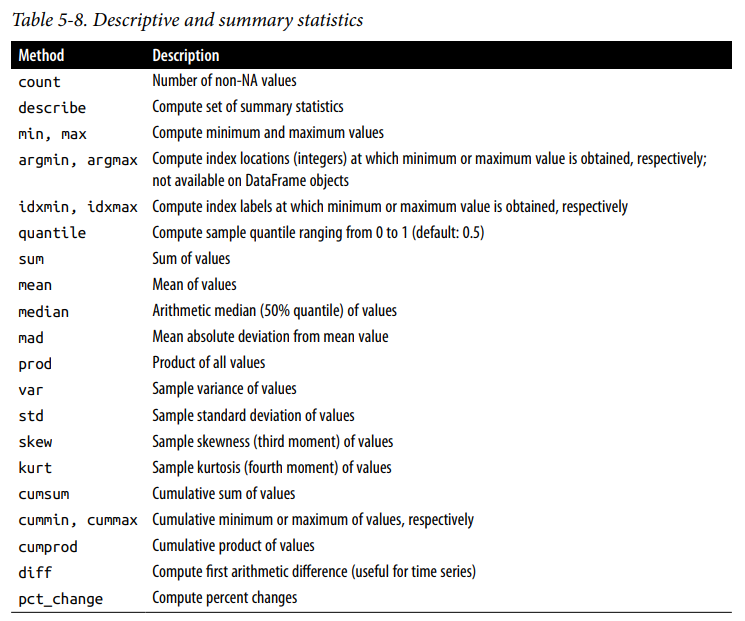

#### Correlação e Covariância

Temos alguns métodos que permitem avaliar correlação e covariância entre colunas de forma direta:

In [ ]:
# Correlação da coluna 'a' com a coluna 'b'

dados['a'].corr(dados['b'])

0.49055502889540636

Podemos imprimir também a matriz de correlação e covariância de todo o banco de dados, se quisermos:

In [ ]:
# Matriz de correlação

dados.corr()

f         g         h         a         b         c         x  \
f  1.000000  0.131880 -0.154135  0.641464  0.441828 -0.106684 -0.278090   
g  0.131880  1.000000  0.181428 -0.309988  0.644324  0.455076  0.839521   
h -0.154135  0.181428  1.000000 -0.813955 -0.600128  0.958221 -0.140747   
a  0.641464 -0.309988 -0.813955  1.000000  0.490555 -0.830277 -0.283674   
b  0.441828  0.644324 -0.600128  0.490555  1.000000 -0.357319  0.653399   
c -0.106684  0.455076  0.958221 -0.830277 -0.357319  1.000000  0.119242   
x -0.278090  0.839521 -0.140747 -0.283674  0.653399  0.119242  1.000000   
y  0.420300  0.421111  0.811837 -0.420902 -0.155547  0.854665 -0.102489   
z  0.632004  0.716813 -0.391215  0.438528  0.952849 -0.148325  0.553936   

          y         z  
f  0.420300  0.632004  
g  0.421111  0.716813  
h  0.811837 -0.391215  
a -0.420902  0.438528  
b -0.155547  0.952849  
c  0.854665 -0.148325  
x -0.102489  0.553936  
y  1.000000  0.137942  
z  0.137942  1.000000

In [ ]:
# Matriz de Covariância

dados.cov()

f         g         h         a         b         c         x  \
f  1.002617  0.158269 -0.088209  0.195899  0.083875 -0.216234 -0.539100   
g  0.158269  1.436466  0.124278 -0.113315  0.146408  1.104048  1.948029   
h -0.088209  0.124278  0.326653 -0.141885 -0.065028  1.108576 -0.155739   
a  0.195899 -0.113315 -0.141885  0.093022  0.028366 -0.512592 -0.167505   
b  0.083875  0.146408 -0.065028  0.028366  0.035944 -0.137128  0.239833   
c -0.216234  1.104048  1.108576 -0.512592 -0.137128  4.097450  0.467308   
x -0.539100  1.948029 -0.155739 -0.167505  0.239833  0.467308  3.748283   
y  0.286723  0.343858  0.316116 -0.087460 -0.020091  1.178658 -0.135185   
z  0.144992  0.196839 -0.051229  0.030644  0.041390 -0.068790  0.245716   

          y         z  
f  0.286723  0.144992  
g  0.343858  0.196839  
h  0.316116 -0.051229  
a -0.087460  0.030644  
b -0.020091  0.041390  
c  1.178658 -0.068790  
x -0.135185  0.245716  
y  0.464162  0.021532  
z  0.021532  0.052495

#### Valores únicos e Contagem de ocorrências

Se em uma série (ou coluna do dataframe) houverem muitos valores repetidos, pode utilizar o método unique para ver quantos valores únicos realmente existem. Se estivesse trabalhando com um banco de dados em painel (*cross-sectional time-series*), você poderia se deparar com a seguinte situação:

In [ ]:
# Exemplo de dataframe com observações repetidas

dados = pd.DataFrame(np.random.standard_normal((16,9)),
                     columns = list("fghabcxyz"),
                     index = ["São Paulo", "São Paulo", "São Paulo", "São Paulo",
                              "Rio de Janeiro", "Rio de Janeiro", "Rio de Janeiro", "Rio de Janeiro",
                              "Bahia", "Bahia", "Bahia","Bahia",
                              "Amazonas", "Amazonas", "Amazonas", "Amazonas"])

dados

f         g         h         a         b         c  \
São Paulo       0.664323  1.184861  0.383780  0.143867  0.812195  0.103040   
São Paulo       0.214523 -0.402695 -1.770324 -0.886441  0.209151  0.866039   
São Paulo       0.716182  1.930404  0.823714  1.237475 -1.663921  0.847546   
São Paulo      -1.437160  0.201392 -1.519896 -0.447850 -0.175983 -0.055107   
Rio de Janeiro  1.705115 -0.689666  0.134545  0.681008 -0.374179  0.600981   
Rio de Janeiro  0.187134  2.018913 -0.844864  0.556782 -1.067094 -0.228595   
Rio de Janeiro -0.376557  0.021239 -0.372819 -0.938130 -0.069948  0.677145   
Rio de Janeiro -0.083162 -0.105895  1.164889 -1.547337 -0.953965 -0.205647   
Bahia          -0.967530  0.604208 -0.347085 -0.499036  0.573012  0.197807   
Bahia           1.053381  0.033392 -2.225249  0.352641  1.729083  0.419244   
Bahia          -0.321728 -0.171935  0.563197 -1.747815  0.912835 -0.091437   
Bahia          -0.054135  0.912634 -1.173538  0.205134  1.997942 -1.795110   
Amazonas        1.490718  0.102630 -0.250795 -0.376549  0.389303 -0.780141   
Amazonas       -1.310531  0.525307  1.430346  0.548366 -0.458478 -0.575812   
Amazonas        0.723731  0.032805 -0.223663 -0.525158  1.562698 -0.357892   
Amazonas        0.766400  1.578308  0.324688  0.726015 -1.560864 -0.387407   

                       x         y         z  
São Paulo       0.356247  0.970838  0.117627  
São Paulo       0.967529 -0.424679  0.041379  
São Paulo       0.028738  0.305845  0.151194  
São Paulo       2.275731  1.550338 -1.336130  
Rio de Janeiro -1.552967  1.936072  0.162693  
Rio de Janeiro -0.985260  0.510822 -0.833265  
Rio de Janeiro  0.123835  0.857263  0.058431  
Rio de Janeiro -0.374214 -1.161383  2.082187  
Bahia          -0.849232  0.692951  0.001714  
Bahia          -1.369206  1.052892  0.914143  
Bahia           0.383071  0.580436 -0.149406  
Bahia           1.905910  0.851747 -0.239839  
Amazonas        0.429009 -0.255121  0.402060  
Amazonas        0.038672  1.295246 -1.238116  
Amazonas       -0.307470  0.484074  0.676844  
Amazonas        0.746945 -1.505453  0.174705

Para contar a quantidade de ocorrências dos estados, poderia utilizar:

In [ ]:
dados.index.unique()

Index(['São Paulo', 'Rio de Janeiro', 'Bahia', 'Amazonas'], dtype='object')

Neste caso, as observações estão no índice, por isso utiliza o método 'index' antes do 'unique'. Mas também pode ser utilizado nas colunas

In [ ]:
dados['f'].unique()

array([ 0.6643233 ,  0.21452288,  0.71618168, -1.43716002,  1.70511515,
        0.18713378, -0.37655687, -0.08316233, -0.96752981,  1.05338131,
       -0.32172834, -0.05413454,  1.49071821, -1.31053141,  0.72373087,
        0.76640031])

Como as variáveis foram extraídas de uma distribuição normal aleatória, temos muitos valores únicos. Esta função é útil quando queremos descobrir quantas unidades de análise realmente temos. Por exemplo, no caso de 'tweets', poderíamos desejar identificar a quantidade de usuários que realmente temos.

Outra função útil é o value counts, que ajuda quando queremos saber a frequência de cada grupo ou unidade de análise:

In [ ]:
series = pd.Series(['José', 'José','Ana','Maria','José','João'])

series.value_counts()

José     3
Ana      1
Maria    1
João     1
dtype: int64

Podemos observar que temos 3 'Josés' no banco. Essa função vai ser de grande utilidade na próxima aula, quando fizermos visualizações com os bancos de dados.

### Exercícios

Antes de ir aos exercícios, explore a documentação própria do Pandas ([Link](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html)) sobre Dataframes

1 - Considere o seguinte DataFrame:

In [ ]:
dados = {
    'Nome': ['Alice', 'Bob', 'Carol', 'David', 'Eva'],
    'Idade': [25, 30, 22, 35, 28],
    'Cidade': ['São Paulo', 'Rio de Janeiro', 'Belo Horizonte', 'São Paulo', 'Rio de Janeiro']
}

df = pd.DataFrame(dados)

df

a) Selecione a coluna 'Nome'.


In [ ]:
nomes = df['Nome']
print(nomes)

b) Selecione a primeira linha do DataFrame.


In [ ]:
primeira_linha = df.iloc[0]
print(primeira_linha)

Nome          Alice
Idade            25
Cidade    São Paulo
Name: 0, dtype: object


c) Selecione o valor 'Bob' da coluna 'Nome'.


In [ ]:
nome_bob = df.loc[df['Nome'] == 'Bob', 'Nome'].values[0]
print(nome_bob)

d) Selecione as linhas onde a idade é maior que 28.

In [ ]:
idade_maior_que_28 = df[df['Idade'] > 28]
print(idade_maior_que_28)

    Nome  Idade          Cidade
1    Bob     30  Rio de Janeiro
3  David     35       São Paulo


e) Selecione as linhas onde a idade está entre 25 e 30 anos (inclusive) e a cidade é 'São Paulo':

In [ ]:
filtro = (df['Idade'] >= 25) & (df['Idade'] <= 30) & (df['Cidade'] == 'São Paulo')
resultados = df[filtro]
print(resultados)

    Nome  Idade     Cidade
0  Alice     25  São Paulo


f) Selecione as linhas onde o nome começa com a letra 'A' ou a idade é menor que 25:

Dica: Você vai precisar do método de strings 'startswith()' ([Link](https://docs.python.org/3/library/stdtypes.html#str.startswith))

In [ ]:
filtro = (df['Nome'].str.startswith('A')) | (df['Idade'] < 25)
resultados = df[filtro]
print(resultados)

    Nome  Idade          Cidade
0  Alice     25       São Paulo
2  Carol     22  Belo Horizonte


2 - Agora vamos exercitar o uso do loc. Considere o seguinte dataframe:

In [ ]:
dados = {
    'Nome': ['Alice', 'Bob', 'Carol', 'David', 'Eva'],
    'Idade': [25, 30, 22, 35, 28],
    'Cidade': ['São Paulo', 'Rio de Janeiro', 'Belo Horizonte', 'São Paulo', 'Rio de Janeiro']
}

df = pd.DataFrame(dados)

a) Use 'loc' para selecionar todas as linhas, mas só as colunas 'nome' e 'idade':

In [ ]:
selecao_a = df.loc[:, ['Nome', 'Idade']]
print(selecao_a)

    Nome  Idade
0  Alice     25
1    Bob     30
2  Carol     22
3  David     35
4    Eva     28


b) Use 'loc' para selecionar a linha com o nome 'David', mas com todas as colunas:

In [ ]:
selecao_b = df.loc[df['Nome'] == 'David', :]
print(selecao_b)

    Nome  Idade     Cidade
3  David     35  São Paulo


c) Por fim, use 'loc' para selecionar as linhas onde a idade é maior que 28 e todas as colunas:

In [ ]:
selecao_c = df.loc[df['Idade'] > 28, :]
print(selecao_c)

    Nome  Idade          Cidade
1    Bob     30  Rio de Janeiro
3  David     35       São Paulo


3 - Vamos trabalhar um pouco o iloc. Considere o mesmo dataframe do exercício 2

a)  Use iloc para selecionar a primeira linha e todas as colunas

In [ ]:
selecao_a = df.iloc[0, :]
print(selecao_a)

Nome          Alice
Idade            25
Cidade    São Paulo
Name: 0, dtype: object


b)  Use iloc para selecionar a última linha e todas as colunas:

In [ ]:
selecao_b = df.iloc[-1, :]
print(selecao_b)

Nome                 Eva
Idade                 28
Cidade    Rio de Janeiro
Name: 4, dtype: object


c) Use iloc para selecionar as três primeiras linhas e todas as colunas:

In [ ]:
selecao_c = df.iloc[:3, :]
print(selecao_c)

    Nome  Idade          Cidade
0  Alice     25       São Paulo
1    Bob     30  Rio de Janeiro
2  Carol     22  Belo Horizonte


4) Vamos criar o banco de novo para garantir que ele não foi modificado.

In [ ]:
dados = {
    'Nome': ['Alice', 'Bob', 'Carol', 'David', 'Eva'],
    'Idade': [25, 30, 22, 35, 28],
    'Cidade': ['São Paulo', 'Rio de Janeiro', 'Belo Horizonte', 'São Paulo', 'Rio de Janeiro']
}

df = pd.DataFrame(dados)

df

Nome  Idade          Cidade
0  Alice     25       São Paulo
1    Bob     30  Rio de Janeiro
2  Carol     22  Belo Horizonte
3  David     35       São Paulo
4    Eva     28  Rio de Janeiro

a) Crie uma coluna de tempo de transporte até o trabalho que vai de 15 a 90 minutos. Ela tem de ser aleatoriamente gerada

In [ ]:
df['Transporte'] = [random.randint(15, 90) for _ in range(5)]

df

Nome  Idade          Cidade  Transporte
0  Alice     25       São Paulo          32
1    Bob     30  Rio de Janeiro          17
2  Carol     22  Belo Horizonte          19
3  David     35       São Paulo          87
4    Eva     28  Rio de Janeiro          47

b) Crie uma coluna de gênero utilizando o método np.random.choice ([Link](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html))

In [ ]:
generos = ['masculino', 'feminino']

df['Genero'] = np.random.choice(generos, size = len(df))

df

Nome  Idade          Cidade  Transporte     Genero
0  Alice     25       São Paulo          32   feminino
1    Bob     30  Rio de Janeiro          17  masculino
2  Carol     22  Belo Horizonte          19  masculino
3  David     35       São Paulo          87  masculino
4    Eva     28  Rio de Janeiro          47  masculino

c) Crie uma coluna de salário da mesma forma que fizemos no exemplo de operações em coluna. Agora, crie uma nova coluna que mostre a razão de 'salário' e 'transporte'.

In [ ]:
df['Salário'] = [random.randint(1000,3000) for _ in range(len(df))]

df['salario/transporte'] = df['Salário'] / df['Transporte']

df

Nome  Idade          Cidade  Transporte     Genero  Salário  \
0  Alice     25       São Paulo          32   feminino     1518   
1    Bob     30  Rio de Janeiro          17  masculino     1796   
2  Carol     22  Belo Horizonte          19  masculino     2941   
3  David     35       São Paulo          87  masculino     2078   
4    Eva     28  Rio de Janeiro          47  masculino     2872   

   salario/transporte  
0           47.437500  
1          105.647059  
2          154.789474  
3           23.885057  
4           61.106383

d) Delete a coluna da razão entre salario e transporte

In [ ]:
del df['salario/transporte']

df

Nome  Idade          Cidade  Transporte     Genero  Salário
0  Alice     25       São Paulo          32   feminino     1518
1    Bob     30  Rio de Janeiro          17  masculino     1796
2  Carol     22  Belo Horizonte          19  masculino     2941
3  David     35       São Paulo          87  masculino     2078
4    Eva     28  Rio de Janeiro          47  masculino     2872

5) Vamos praticar um pouco a aplicação de funções em objetos de Pandas. Considere o banco de dados:

In [ ]:
dados = {
    'Nome': ['Alice', 'Bob', 'Carol', 'David', 'Eva'],
    'Salario': [50000, 60000, 75000, 48000, 80000],
}

df = pd.DataFrame(dados)

df

Nome  Salario
0  Alice    50000
1    Bob    60000
2  Carol    75000
3  David    48000
4    Eva    80000

a) Faça uma função chamada "aumento_salarial" que recebe o salário como entrada e retorna um aumento de 15%

In [ ]:
def aumento_salarial(x):
  return x * 1.15



b) Aplique a função na coluna "Salario" utilizando "apply"

In [ ]:
df['Salario'].apply(aumento_salarial)



0    57500.0
1    69000.0
2    86250.0
3    55200.0
4    92000.0
Name: Salario, dtype: float64

c) Aqui está um dicionário com um mapeamento de categorias com base nos salários. Crie uma função que retorne uma categoria de acordo com o salário da pessoa. Dica -> Mckinney, 2022, P.211

In [ ]:

# Dicionário de Mapeamento

mapeamento_categorias = {
    (0, 50000): 'Baixo',
    (50001, 70000): 'Médio',
    (70001, 80000): 'Alto'
}

def mapear_categoria_salario(salario):
    for intervalo, categoria in mapeamento_categorias.items():
        if intervalo[0] <= salario <= intervalo[1]:
            return categoria

d) Aplique essa função no dataframe, criando uma nova coluna chamada "categoria_salario". Imprima o banco de dados

In [ ]:
df['categoria_salario'] = df["Salario"].apply(mapear_categoria_salario)

df

Nome  Salario categoria_salario
0  Alice    50000             Baixo
1    Bob    60000             Médio
2  Carol    75000              Alto
3  David    48000             Baixo
4    Eva    80000              Alto

6) Considere o seguinte dataframe:

In [ ]:
# Lista de nomes fictícios
nomes_brasileiros = ['João', 'Maria', 'Pedro', 'Ana', 'José', 'Luiza', 'Rafael', 'Fernanda', 'Gustavo', 'Carolina',
                     'Lucas', 'Juliana', 'Marcos', 'Camila', 'Felipe', 'Isabela', 'Mariana', 'Ricardo', 'Sandra']

# Crie um DataFrame com 20 observações aleatórias
dados = {
    'Nome': [random.choice(nomes_brasileiros) for _ in range(30)],
    'Idade': [random.randint(20, 60) for _ in range(30)],
    'Cidade': [random.choice(['São Paulo', 'Rio de Janeiro', 'Belo Horizonte', 'Salvador', 'Brasília']) for _ in range(30)],
    'Salario': [random.randint(1000,7000) for _ in range(30)]
}

df = pd.DataFrame(dados)

# Exiba o DataFrame
print(df)

        Nome  Idade          Cidade  Salario
0      Pedro     56  Rio de Janeiro     5562
1     Sandra     22        Salvador     5029
2    Ricardo     32        Brasília     1745
3    Mariana     48       São Paulo     3785
4   Fernanda     60        Brasília     6650
5    Gustavo     26  Belo Horizonte     1915
6       João     43  Belo Horizonte     1942
7    Mariana     20        Brasília     3806
8    Gustavo     53  Belo Horizonte     6869
9    Isabela     59  Rio de Janeiro     3353
10      José     48  Rio de Janeiro     5329
11   Ricardo     28        Brasília     1595
12      João     60        Brasília     1748
13  Fernanda     43        Salvador     6462
14   Isabela     39  Belo Horizonte     4726
15    Felipe     22        Salvador     5106
16     Maria     30        Salvador     2710
17    Camila     39        Salvador     6113
18      José     49        Salvador     2016
19    Camila     23  Belo Horizonte     5326
20     Luiza     34  Rio de Janeiro     2007
21   Julia

a) Calcule a idade média e imprima o resultado como um valor inteiro

In [ ]:
media = df.Idade.mean()

print(int(media))

40


b) Calcule a mediana dos salários

In [ ]:
df.Salario.median()

3795.5

c) Calcule o desvio padrão do salário e das idades e imprima de forma adequada usando f strings.

In [ ]:
desv_sal = df.Salario.std()
desv_idade = df.Idade.std()


print(f'O Desvio Padrão do salário é de {round(desv_sal,2)} e o da Idade é {round(desv_idade,2)}')


O Desvio Padrão do salário é de 1678.58 e o da Idade é 12.45


d) Calcule a soma dos salários:

In [ ]:
df.Salario.sum()

113834

e) Encontre o indice do maior valor da idade e imprima a linha

In [ ]:
indice = df.Idade.idxmax()

print(df.iloc[indice])

Nome       Fernanda
Idade            60
Cidade     Brasília
Salario        6650
Name: 4, dtype: object


f) Utilize describe para obter estatísticas descritivas de toda a tabela

In [ ]:
df.describe()

Idade      Salario
count  30.000000    30.000000
mean   41.200000  3952.800000
std     9.263946  1775.988047
min    26.000000  1122.000000
25%    33.250000  2175.000000
50%    41.500000  4289.000000
75%    48.250000  5318.750000
max    57.000000  6966.000000

g) O describe também gera um dataframe como resultado. Atribua o resultado do describe à um objeto e selecione as linhas de '25%', '50%' e '75%'

In [ ]:
dados2 = df.describe()

dados2.iloc[4:7, :]

Idade  Salario
25%  33.25  2175.00
50%  41.50  4289.00
75%  48.25  5318.75

e) Qual a correlação entre idade e salário?

In [ ]:
df['Idade'].corr(df['Salario'])

0.22319883260726447

f) e a Covariância destes dois?

In [ ]:
df['Idade'].cov(df['Salario'])

3672.213793103449

h) Quantos nomes únicos temos no dataframe?

In [ ]:
# Resposta mais simples

df.Nome.unique()

array(['Isabela', 'Ana', 'Gustavo', 'Carolina', 'Marcos', 'Juliana',
       'Rafael', 'Lucas', 'Pedro', 'Sandra', 'Luiza', 'José', 'Camila',
       'Maria', 'João'], dtype=object)

In [ ]:
# Resposta mais elaborada

array_nomes = df.Nome.unique()

series_nomes = pd.Series(array_nomes)

series_nomes.value_counts().sum()

15

## Importando Arquivos

O Pandas é uma das bibliotecas Python mais amplamente usadas para a manipulação de dados. Uma das tarefas mais comuns ao trabalhar com dados é importar dados de diferentes fontes, como arquivos CSV, Excel, SQL e muitos outros formatos. O Pandas facilita a importação desses dados em DataFrames, que são similares à planilhas. Agora, finalmente podemos trabalhar com dados reais.


### 1 - Instalar e importar o Pandas

O primeiro passo é instalar e importar o Pandas. Como estamos trabalhando no colab, o Pandas já vem instalado. E para importar, fazemos do mesmo modo de sempre.

In [ ]:
import pandas as pd

### 2 - Escolher o método de importação

O Pandas oferece diversos métodos de importação, cada um adequado a diferentes tipos de fontes de dados. Alguns dos métodos de importação mais comuns incluem:

* pd.read_csv(): Para importar dados de arquivos CSV.
* pd.read_excel(): Para importar dados de arquivos Excel (XLSX).
* pd.read_stata(): Para importar dados de arquivos no formato do Stata;
* pd.read_sql(): Para importar dados de bancos de dados SQL.
* pd.read_json(): Para importar dados de arquivos JSON.
* pd.read_html(): Para importar dados de páginas da web HTML (usando o Pandas HTML reader).

### 3 - Especificar o caminho do arquivo e realizar a importação

Se você estivesse trabalhando direto do seu computador (com VScode, Spyder) , poderia fazer do seguinte modo:

In [ ]:
caminho_arquivo = 'caminho/do/seu/arquivo.csv'

df = pd.read_csv(caminho_arquivo)

No entanto, estamos no Colab. Aqui há duas maneiras:

a) Inserir manualmente o arquivo dentro do Colab.

No lado esquerdo da interface do Colab, há uma aba chamada "Arquivos", com o formato de uma pasta. Ao clicar nela há algumas opções imediatamente abaixo de "arquivos". Uma delas é a de "Fazer upload para o armazenamento da sessão". A partir dela poderia inserir diretamente um arquivo do seu computador dentro do colab, que poderia ser chamado do mesmo modo que especificado acima. No entanto, o Colab também nos dá algumas amostras que podemos importar sem baixar nada. Na mesma seção de "Arquivos" há uma subpasta chamada "sample_data", que podemos utilizar diretamente.

In [ ]:
caminho_arquivo = 'sample_data/mnist_train_small.csv'

df = pd.read_csv(caminho_arquivo)

df.head()

6  0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  ...  0.581  0.582  0.583  \
0  5  0    0    0    0    0    0    0    0    0  ...      0      0      0   
1  7  0    0    0    0    0    0    0    0    0  ...      0      0      0   
2  9  0    0    0    0    0    0    0    0    0  ...      0      0      0   
3  5  0    0    0    0    0    0    0    0    0  ...      0      0      0   
4  2  0    0    0    0    0    0    0    0    0  ...      0      0      0   

   0.584  0.585  0.586  0.587  0.588  0.589  0.590  
0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0  

[5 rows x 785 columns]

É um banco um pouco esotérico, vamos ver o banco do setor imobiliário da California

In [ ]:
caminho_arquivo = 'sample_data/california_housing_train.csv'

df = pd.read_csv(caminho_arquivo)

df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -114.31     34.19                15.0       5612.0          1283.0   
1    -114.47     34.40                19.0       7650.0          1901.0   
2    -114.56     33.69                17.0        720.0           174.0   
3    -114.57     33.64                14.0       1501.0           337.0   
4    -114.57     33.57                20.0       1454.0           326.0   

   population  households  median_income  median_house_value  
0      1015.0       472.0         1.4936             66900.0  
1      1129.0       463.0         1.8200             80100.0  
2       333.0       117.0         1.6509             85700.0  
3       515.0       226.0         3.1917             73400.0  
4       624.0       262.0         1.9250             65500.0

Da mesma forma que vimos anteriormente, podemos explorar os dados utilizando describe (ou info(), que não utilizamos antes)

In [ ]:
df.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  17000.000000  17000.000000        17000.000000  17000.000000   
mean    -119.562108     35.625225           28.589353   2643.664412   
std        2.005166      2.137340           12.586937   2179.947071   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.790000     33.930000           18.000000   1462.000000   
50%     -118.490000     34.250000           29.000000   2127.000000   
75%     -118.000000     37.720000           37.000000   3151.250000   
max     -114.310000     41.950000           52.000000  37937.000000   

       total_bedrooms    population    households  median_income  \
count    17000.000000  17000.000000  17000.000000   17000.000000   
mean       539.410824   1429.573941    501.221941       3.883578   
std        421.499452   1147.852959    384.520841       1.908157   
min          1.000000      3.000000      1.000000       0.499900   
25%        297.000000    790.000000    282.000000       2.566375   
50%        434.000000   1167.000000    409.000000       3.544600   
75%        648.250000   1721.000000    605.250000       4.767000   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        17000.000000  
mean        207300.912353  
std         115983.764387  
min          14999.000000  
25%         119400.000000  
50%         180400.000000  
75%         265000.000000  
max         500001.000000

Temos 17 mil observações, com bastante variação nos dados

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


Pelo info, podemos ver que não temos valores nulos e todos são do tipo float.

B) Uma outra opção no colab é o de "montar o seu Drive" dentro dele, para que possa acessar seus arquivos diretamente sem ficar inserindo eles na seção do Colab toda vez que entra nele. Ao rodar o seguinte código, ele vai te pedir permissão para acessar seu drive.

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


Por exemplo, digamos que seus dados estivessem na pasta 'projeto" dentro da pasta "meu drive".

In [ ]:
caminho = 'content/drive/MyDrive/projeto/dados.csv'

df = pd.read_csv(caminho)

FileNotFoundError: ignored

Aqui o código vai dar erro, por que nem a pasta nem os dados existem. Agora, vamos tentar acessar o .csv que deixei na pasta da semana 4. Note que não é preciso atribuir o caminho, sendo possível colocá-lo diretamente dentro do 'read_csv'.

In [ ]:
# Vespertino

df = pd.read_csv('/content/drive/MyDrive/FLS6513 FLP0422 - Alunos (Vespertino)/Semana 4 (28-08)/wti-monthly.csv')

# Noturno

# df = pd.read_csv('/content/drive/MyDrive/FLS6513 FLP0422 - Alunos (Noturno)/Semana 4 (28-08)/wti-monthly.csv')

df.head()

Date  Price
0  1986-01-15  22.93
1  1986-02-15  15.46
2  1986-03-15  12.61
3  1986-04-15  12.84
4  1986-05-15  15.38

Esses dados se referem ao preço do petróleo como catalogado no WTI (Western Texas Intermediate) disponível no seguinte [link](https://github.com/datasets/oil-prices).

Uma terceira opção, que não é relacionada diretamente com o Colab, nos permite importar bancos de dados diretamente da internet, como, por exemplo, dados que estão no Github. Primeiro, vá no link que forneci acima. Clique na pasta "data", escolha um .csv e clique nele. Procure do lado direito um botão nomeado como "raw". Por fim, copie o url dele e o use para carregar bancos de dados diretamente do github.

In [ ]:
caminho = 'https://raw.githubusercontent.com/datasets/oil-prices/main/data/wti-daily.csv'

df = pd.read_csv(caminho, index_col=0)

df.head()



Price
Date             
1986-01-02  25.56
1986-01-03  26.00
1986-01-06  26.53
1986-01-07  25.85
1986-01-08  25.87

No capítulo 6 do livro texto obrigatório, o autor discorre sobre várias formas de importação com diversos tipos de arquivos, introduzindo um pouco até o webscraping. Como esse não é o intuito da aula, pararemos por aqui. Ele também mostra alguns arquivos com problemas comuns e como solucionar eles. Insistimos que leiam sobre os principais erros que podem encontrar pois podem ser soluções utéis.

### Exercícios

1 - Baixe o seguinte banco de dados do [Kaggle](https://www.kaggle.com/datasets/zynicide/wine-reviews?resource=download) e o importe no Colab utilizando o primeiro modo ensinado. Isto é, ir em arquivos e inseri-lo manualmente. Dica: Depois de inseri-lo, pode copiar o caminho clicando com o botão direito em cima do .csv no colab

In [11]:
caminho_arquivo = '/content/winemag-data-130k-v2.csv'

df = pd.read_csv(caminho_arquivo)

df.head()

Unnamed: 0   country                                        description  \
0           0     Italy  Aromas include tropical fruit, broom, brimston...   
1           1  Portugal  This is ripe and fruity, a wine that is smooth...   
2           2        US  Tart and snappy, the flavors of lime flesh and...   
3           3        US  Pineapple rind, lemon pith and orange blossom ...   
4           4        US  Much like the regular bottling from 2012, this...   

                          designation  points  price           province  \
0                        Vulkà Bianco      87    NaN  Sicily & Sardinia   
1                            Avidagos      87   15.0              Douro   
2                                 NaN      87   14.0             Oregon   
3                Reserve Late Harvest      87   13.0           Michigan   
4  Vintner's Reserve Wild Child Block      87   65.0             Oregon   

              region_1           region_2         taster_name  \
0                 Etna                NaN       Kerin O’Keefe   
1                  NaN                NaN          Roger Voss   
2    Willamette Valley  Willamette Valley        Paul Gregutt   
3  Lake Michigan Shore                NaN  Alexander Peartree   
4    Willamette Valley  Willamette Valley        Paul Gregutt   

  taster_twitter_handle                                              title  \
0          @kerinokeefe                  Nicosia 2013 Vulkà Bianco  (Etna)   
1            @vossroger      Quinta dos Avidagos 2011 Avidagos Red (Douro)   
2           @paulgwine       Rainstorm 2013 Pinot Gris (Willamette Valley)   
3                   NaN  St. Julian 2013 Reserve Late Harvest Riesling ...   
4           @paulgwine   Sweet Cheeks 2012 Vintner's Reserve Wild Child...   

          variety               winery  
0     White Blend              Nicosia  
1  Portuguese Red  Quinta dos Avidagos  
2      Pinot Gris            Rainstorm  
3        Riesling           St. Julian  
4      Pinot Noir         Sweet Cheeks

a) Traga as principais estatísticas descritivas do banco

In [12]:
df.describe()

Unnamed: 0         points          price
count  129971.000000  129971.000000  120975.000000
mean    64985.000000      88.447138      35.363389
std     37519.540256       3.039730      41.022218
min         0.000000      80.000000       4.000000
25%     32492.500000      86.000000      17.000000
50%     64985.000000      88.000000      25.000000
75%     97477.500000      91.000000      42.000000
max    129970.000000     100.000000    3300.000000

b) Qual a origem mais comum dos vinhos? (Top 5)

In [ ]:
df.country.value_counts()[:5]

US          19216
France       7937
Italy        7163
Spain        2363
Portugal     2074
Name: country, dtype: int64

c) Qual o preço médio?

In [ ]:
df.price.mean()

35.33328695006841

d) Quem é o sommelier que mais aparece no banco?

In [ ]:
df.taster_name.value_counts()[:1]

Roger Voss    9213
Name: taster_name, dtype: int64

2) Baixe os arquivos com os resultados das [eleições](https://sig.tse.jus.br/ords/dwapr/r/seai/sig-eleicao-resultados/resultado-da-eleição?p0_abrangencia=UF&clear=RP&session=6209947300226) de 2022 por UF e importe no Pandas da mesma forma que o 1. Dicas: Problemas no [delimiter](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) e no [encoding](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) (encoding = 'latin-1')

In [ ]:
caminho_arquivo = '/content/votacao_candidato-uf_2022.csv'

df = pd.read_csv(caminho_arquivo,
                 delimiter = ';',
                 encoding = 'latin-1')

df.head()

sg_uf  cd_cargo    ds_cargo  nr_candidato               nm_candidato  \
0    AC         1  Presidente            22     JAIR MESSIAS BOLSONARO   
1    AC         1  Presidente            13  LUIZ INÁCIO LULA DA SILVA   
2    AC         1  Presidente            15        SIMONE NASSAR TEBET   
3    AC         1  Presidente            12        CIRO FERREIRA GOMES   
4    AC         1  Presidente            44    SORAYA VIEIRA THRONICKE   

  nm_urna_candidato sg_partido  \
0    JAIR BOLSONARO         PL   
1              LULA         PT   
2      SIMONE TEBET        MDB   
3        CIRO GOMES        PDT   
4  SORAYA THRONICKE      UNIÃO   

                             ds_composicao_coligacao  nr_turno  \
0                             PP / REPUBLICANOS / PL         1   
1  (PT/PC do B/PV) / SOLIDARIEDADE / (PSOL/REDE) ...         1   
2                      MDB / (PSDB/CIDADANIA) / PODE         1   
3                                                PDT         1   
4                                              UNIÃO         1   

  ds_sit_totalizacao   dt_ult_totalizacao sg_ue  sq_candidato  \
0      Segundo turno  2022-10-04 12:06:36    BR  280001618036   
1      Segundo turno  2022-10-04 12:06:36    BR  280001607829   
2         Não Eleito  2022-10-04 12:06:36    BR  280001607833   
3         Não Eleito  2022-10-04 12:06:36    BR  280001612393   
4         Não Eleito  2022-10-04 12:06:36    BR  280001644128   

  nm_tipo_destinacao_votos  sq_eleicao_divulga pc_votos_validos  \
0                   Válido          2040602022            0,625   
1                   Válido          2040602022           0,2926   
2                   Válido          2040602022           0,0456   
3                   Válido          2040602022           0,0279   
4                   Válido          2040602022           0,0055   

   qt_votos_nom_validos  qt_votos_concorrentes  
0                275582                 440917  
1                129022                 440917  
2                 20122                 440917  
3                 12314                 440917  
4                  2444                 440917

a) Filtre o que é relacionado só com o cargo de presidente e no primeiro turno

In [ ]:
df = df[(df['ds_cargo'] == 'Presidente') & (df['nr_turno'] == 1)]

df


sg_uf  cd_cargo    ds_cargo  nr_candidato  \
0        AC         1  Presidente            22   
1        AC         1  Presidente            13   
2        AC         1  Presidente            15   
3        AC         1  Presidente            12   
4        AC         1  Presidente            44   
...     ...       ...         ...           ...   
26537    ZZ         1  Presidente            21   
26538    ZZ         1  Presidente            16   
26539    ZZ         1  Presidente            14   
26540    ZZ         1  Presidente            80   
26541    ZZ         1  Presidente            27   

                              nm_candidato    nm_urna_candidato sg_partido  \
0                   JAIR MESSIAS BOLSONARO       JAIR BOLSONARO         PL   
1                LUIZ INÁCIO LULA DA SILVA                 LULA         PT   
2                      SIMONE NASSAR TEBET         SIMONE TEBET        MDB   
3                      CIRO FERREIRA GOMES           CIRO GOMES        PDT   
4                  SORAYA VIEIRA THRONICKE     SORAYA THRONICKE      UNIÃO   
...                                    ...                  ...        ...   
26537                  SOFIA PADUA MANZANO        SOFIA MANZANO        PCB   
26538  VERA LUCIA PEREIRA DA SILVA SALGADO                 VERA       PSTU   
26539           KELMON LUIS DA SILVA SOUZA         PADRE KELMON        PTB   
26540       LEONARDO PÉRICLES VIEIRA ROQUE         LÉO PÉRICLES         UP   
26541                    JOSE MARIA EYMAEL  CONSTITUINTE EYMAEL         DC   

                                 ds_composicao_coligacao  nr_turno  \
0                                 PP / REPUBLICANOS / PL         1   
1      (PT/PC do B/PV) / SOLIDARIEDADE / (PSOL/REDE) ...         1   
2                          MDB / (PSDB/CIDADANIA) / PODE         1   
3                                                    PDT         1   
4                                                  UNIÃO         1   
...                                                  ...       ...   
26537                                                PCB         1   
26538                                               PSTU         1   
26539                                                PTB         1   
26540                                                 UP         1   
26541                                                 DC         1   

      ds_sit_totalizacao   dt_ult_totalizacao sg_ue  sq_candidato  \
0          Segundo turno  2022-10-04 12:06:36    BR  280001618036   
1          Segundo turno  2022-10-04 12:06:36    BR  280001607829   
2             Não Eleito  2022-10-04 12:06:36    BR  280001607833   
3             Não Eleito  2022-10-04 12:06:36    BR  280001612393   
4             Não Eleito  2022-10-04 12:06:36    BR  280001644128   
...                  ...                  ...   ...           ...   
26537         Não Eleito  2022-10-04 12:06:36    BR  280001600167   
26538         Não Eleito  2022-10-04 12:06:36    BR  280001607831   
26539         Não Eleito  2022-10-04 12:06:36    BR  280001734029   
26540         Não Eleito  2022-10-04 12:06:36    BR  280001602702   
26541         Não Eleito  2022-10-04 12:06:36    BR  280001677435   

      nm_tipo_destinacao_votos  sq_eleicao_divulga pc_votos_validos  \
0                       Válido          2040602022            0,625   
1                       Válido          2040602022           0,2926   
2                       Válido          2040602022           0,0456   
3                       Válido          2040602022           0,0279   
4                       Válido          2040602022           0,0055   
...                        ...                 ...              ...   
26537                   Válido          2040602022           0,0021   
26538                   Válido          2040602022           0,0016   
26539                   Válido          2040602022           0,0012   
26540                   Válido          2040602022           0,0011   
26541

b) Crie um novo dataframe só com as colunas sg_uf, nm_urna_candidato, pc_votos_validos e qt_votos_nom_validos. Use 'reset_index()' para reconfigurar o índice.

In [14]:
df2 = df[['sg_uf', 'nm_urna_candidato', 'pc_votos_validos', 'qt_votos_nom_validos']].reset_index()

df2

KeyError: ignored

c) Mostre o maior valor de qt_votos_nom_validos e a linha em que ocorre

In [13]:
maior = df2.qt_votos_nom_validos.max()
linha = df2.qt_votos_nom_validos.idxmax()

print(f'O maior valor é de {maior} e ele ocorre na linha {linha}')
print(df2.iloc[275])





NameError: ignored

3) Importe "tweets_annotated.csv" do seguinte [repositório](https://github.com/PedroSchmalz/covid19-tweets-brazilian-mayoral-candidates).

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/PedroSchmalz/covid19-tweets-brazilian-mayoral-candidates/main/tweets_annotated.csv')

df

date_post             tweet_id  \
0     2020-03-19  1240808239224090112   
1     2020-03-20  1241121140988410112   
2     2020-03-22  1241825454539120128   
3     2020-09-01  1300918558067770112   
4     2020-10-21  1319042054463290112   
...          ...                  ...   
7051  2021-06-28  1409592686840066048   
7052  2021-04-30  1388202351996150016   
7053  2021-03-19  1372931201871281920   
7054  2021-10-09  1446834442031575040   
7055  2021-08-02  1422321283350639104   

                                                content  post_vaccine  \
0     Tenho duas amigas doutorandas na USP. Não estã...             1   
1     Senado: Promulgado artigo que protege IBGE, Em...             0   
2     ATENÇÃO: programem-se para a vacinação contra ...             0   
3     Chega a ser inacreditável que o governo esteja...             1   
4     Como prefeito, vamos garantir através da Prefe...             1   
...                                                 ...           ...   
7051  Com os depoimentos dos irmãos Miranda foi dado...             1   
7052  Muitas pessoas estão questionando por que segu...             1   
7053  Gen Heleno de MÁSCARA, tomando VACINA. Cloroqu...             1   
7054  As UBS Hélio Macedo, Aygara Motta, Dalmo Feito...             1   
7055  Acompanhei a vacinação contra covid-19 das equ...             1   

      positions_vac  
0               1.0  
1               NaN  
2               NaN  
3               1.0  
4               1.0  
...             ...  
7051            2.0  
7052            2.0  
7053            1.0  
7054            1.0  
7055            1.0  

[7056 rows x 5 columns]

a) Exclua as linhas em que 'post_vaccine' é igual a 0 e salve isso em um novo dataframe

In [ ]:
df2 = df[df['post_vaccine'] == 1]

df2

date_post             tweet_id  \
0     2020-03-19  1240808239224090112   
3     2020-09-01  1300918558067770112   
4     2020-10-21  1319042054463290112   
5     2020-11-17  1328772384585860096   
6     2020-11-19  1329419704847490048   
...          ...                  ...   
7051  2021-06-28  1409592686840066048   
7052  2021-04-30  1388202351996150016   
7053  2021-03-19  1372931201871281920   
7054  2021-10-09  1446834442031575040   
7055  2021-08-02  1422321283350639104   

                                                content  post_vaccine  \
0     Tenho duas amigas doutorandas na USP. Não estã...             1   
3     Chega a ser inacreditável que o governo esteja...             1   
4     Como prefeito, vamos garantir através da Prefe...             1   
5     E reafirmando o compromisso de, como Prefeito,...             1   
6     Égua já pensaste?! Não sei se dá pra ser assim...             1   
...                                                 ...           ...   
7051  Com os depoimentos dos irmãos Miranda foi dado...             1   
7052  Muitas pessoas estão questionando por que segu...             1   
7053  Gen Heleno de MÁSCARA, tomando VACINA. Cloroqu...             1   
7054  As UBS Hélio Macedo, Aygara Motta, Dalmo Feito...             1   
7055  Acompanhei a vacinação contra covid-19 das equ...             1   

      positions_vac  
0               1.0  
3               1.0  
4               1.0  
5               1.0  
6               1.0  
...             ...  
7051            2.0  
7052            2.0  
7053            1.0  
7054            1.0  
7055            1.0  

[6420 rows x 5 columns]

b) Use o dataframe do exercício anterior para mostrar as frequências das categorias de positions_vac

In [ ]:
df2['positions_vac'].value_counts()



1.0    3999
2.0    2167
3.0     252
0.0       1
Name: positions_vac, dtype: int64

## Limpeza e Manipulação de dados

Na análise de dados e modelagem, 'uma grande quantidade de tempo é gasta na preparação de dados: carregar, limpar, transformar e reorganizar. Essas tarefas podem tomar até 80% do tempo de um analista' (Mckinney, 2022, p.203). A limpeza e a preparação de dados são etapas essenciais no processo de análise de dados. Elas envolvem a transformação e o aprimoramento dos dados brutos em um formato adequado e limpo para análise. Essas etapas são cruciais porque os dados nem sempre estão prontos para uso imediato e podem conter inconsistências, erros ou valores ausentes.

A limpeza e a preparação de dados podem consumir uma parte significativa do tempo de um projeto de análise de dados, mas são fundamentais para garantir que os resultados sejam confiáveis e úteis. Uma vez que os dados estejam preparados adequadamente, você estará pronto para realizar análises exploratórias, modelagem de dados, visualizações e, finalmente, obter inferências a partir dos dados.



### Lidando com dados ausentes

Lidar com dados ausentes, também conhecidos como dados "missing" em Pandas, é uma parte importante da análise de dados, pois muitas vezes os conjuntos de dados reais contêm valores ausentes em algumas observações ou colunas. O Pandas oferece várias ferramentas e métodos para lidar com dados ausentes de forma eficaz. Aqui estão algumas estratégias comuns:


* 1 - Identificação de Dados Ausentes:

isna() e isnull(): Essas funções permitem verificar se os valores são nulos. Por exemplo, df.isna() retornará um DataFrame booleano indicando quais valores são nulos.

notna() e notnull(): Permitem verificar se os valores não são nulos.


In [ ]:
dados = pd.Series([1,2,3,np.nan,10])

dados.isna()

0    False
1    False
2    False
3     True
4    False
dtype: bool

* 2 - Remoção de Dados Ausentes

dropna(): Esse método permite remover linhas ou colunas com valores ausentes. Por padrão, ele remove qualquer linha que contenha pelo menos um valor ausente.

In [ ]:
dados.dropna()

0     1.0
1     2.0
2     3.0
4    10.0
dtype: float64

dropna(subset=['coluna']): Você pode especificar uma coluna específica para verificar e remover apenas as linhas que contêm valores ausentes nessa coluna.

In [ ]:
dados = {
    "Nome": ["Alice", "Bob", "Carol", "David", "Eva"],
    "Idade": [25, 30, 22, 35, np.nan],
    "Cidade": ["São Paulo", "Rio de Janeiro", "Belo Horizonte", "São Paulo", "Rio de Janeiro"]
}

dados = pd.DataFrame(dados)

dados

Nome  Idade          Cidade
0  Alice   25.0       São Paulo
1    Bob   30.0  Rio de Janeiro
2  Carol   22.0  Belo Horizonte
3  David   35.0       São Paulo
4    Eva    NaN  Rio de Janeiro

Dropando as linhas com missing em "idade"

In [ ]:
dados.dropna(subset=['Idade'])

Nome  Idade          Cidade
0  Alice   25.0       São Paulo
1    Bob   30.0  Rio de Janeiro
2  Carol   22.0  Belo Horizonte
3  David   35.0       São Paulo

* 3 - Preenchimento de Dados Ausentes:

fillna(valor): Esse método permite preencher valores ausentes com um valor específico. Por exemplo, df.fillna(0) preencherá todos os valores ausentes com zero.

fillna(metodo): Você também pode usar métodos como 'ffill' (preenchimento para frente) ou 'bfill' (preenchimento para trás) para preencher os valores ausentes com base nos valores próximos na mesma coluna.

In [ ]:
dados = {
    "Nome": ["Alice", "Bob", "Carol", "David", "Eva"],
    "Idade": [25, 30, 22, 35, np.nan],
    "Cidade": ["São Paulo", "Rio de Janeiro", "Belo Horizonte", "São Paulo", "Rio de Janeiro"]
}

dados = pd.DataFrame(dados, columns=['Nome', 'Idade', 'Cidade', 'Salário'])

dados

Nome  Idade          Cidade Salário
0  Alice   25.0       São Paulo     NaN
1    Bob   30.0  Rio de Janeiro     NaN
2  Carol   22.0  Belo Horizonte     NaN
3  David   35.0       São Paulo     NaN
4    Eva    NaN  Rio de Janeiro     NaN

In [ ]:
dados.fillna(0)

Nome  Idade          Cidade  Salário
0  Alice   25.0       São Paulo        0
1    Bob   30.0  Rio de Janeiro        0
2  Carol   22.0  Belo Horizonte        0
3  David   35.0       São Paulo        0
4    Eva    0.0  Rio de Janeiro        0

Para usar métodos

In [ ]:
df = pd.DataFrame(np.random.standard_normal((6,3)))

df.iloc[2:, 1] = np.nan
df.iloc[4:, 2] = np.nan

df


0         1         2
0  1.524942  1.720838  0.907236
1 -0.614782  0.420707 -1.283050
2  0.704547       NaN -1.186298
3  0.120769       NaN  1.313455
4  0.934829       NaN       NaN
5  0.454356       NaN       NaN

O método ffill do Pandas é usado para preencher valores ausentes em um DataFrame ou em uma Série com os valores próximos válidos que estão imediatamente antes dos valores ausentes ao longo do eixo especificado. O termo "ffill" significa "forward fill", o que indica que ele preenche os valores ausentes avançando na direção dos índices maiores.

In [ ]:
df.fillna(method='ffill')

0         1         2
0  1.524942  1.720838  0.907236
1 -0.614782  0.420707 -1.283050
2  0.704547  0.420707 -1.186298
3  0.120769  0.420707  1.313455
4  0.934829  0.420707  1.313455
5  0.454356  0.420707  1.313455

Você também pode interpolar pela média

In [ ]:
df.fillna(df.mean())

0         1         2
0  1.524942  1.720838  0.907236
1 -0.614782  0.420707 -1.283050
2  0.704547  1.070772 -1.186298
3  0.120769  1.070772  1.313455
4  0.934829  1.070772 -0.062164
5  0.454356  1.070772 -0.062164

É importante destacar que o uso de métodos de preenchimento de valores ausentes, como ffill (preenchimento para frente) e interpolação pela média, tem suas limitações e pode introduzir vieses nos dados ou até mesmo distorcer as análises, dependendo do contexto.

### Transformação dos Dados

A transformação de dados em Pandas envolve a modificação dos dados originais para prepará-los para análise. Vamos discutir algumas operações comuns de transformação de dados em Pandas:


* 1 - Remoção de observações duplicadas:

Para remover linhas duplicadas em um DataFrame, você pode usar o método drop_duplicates():

In [ ]:
df.drop_duplicates() # Como não há obs duplicadas, nada acontece

0         1         2
0  1.524942  1.720838  0.907236
1 -0.614782  0.420707 -1.283050
2  0.704547       NaN -1.186298
3  0.120769       NaN  1.313455
4  0.934829       NaN       NaN
5  0.454356       NaN       NaN

* 2 - Substituição de Valores

Para substituir valores em um DataFrame, você pode usar o método replace():

In [ ]:
# df['Coluna'].replace(valor_antigo, valor_novo, inplace=True)

Isso substituirá todos os valores valor_antigo pela valor_novo na coluna especificada. Suponha que temos um DataFrame com informações sobre produtos e queremos substituir nomes de categorias específicas por nomes abreviados.

In [ ]:
dados = {
    'Produto': ['Laptop', 'Mouse', 'Teclado', 'Monitor', 'Impressora'],
    'Categoria': ['Eletrônicos', 'Periféricos', 'Periféricos', 'Eletrônicos', 'Outros']
}

df = pd.DataFrame(dados)

# Substituir a categoria 'Eletrônicos' por 'Elec' e 'Periféricos' por 'Perif'
df['Categoria'].replace({'Eletrônicos': 'Elec', 'Periféricos': 'Perif'}, inplace=True)

print(df)

      Produto Categoria
0      Laptop      Elec
1       Mouse     Perif
2     Teclado     Perif
3     Monitor      Elec
4  Impressora    Outros


Neste exemplo, usamos o método replace() para substituir os valores da coluna 'Categoria'. O dicionário passado como argumento para replace() mapeia os valores antigos (chaves) para os novos valores (valores correspondentes). Os valores 'Eletrônicos' foram substituídos por 'Elec' e 'Periféricos' foram substituídos por 'Perif'. O uso de inplace=True faz a substituição diretamente no DataFrame original.

Essa é uma maneira simples de realizar substituições em um DataFrame do Pandas, útil para modificar valores com base em critérios específicos durante a preparação dos dados para análise.

* 3 - Discretização e *Binning*:

A discretização é o processo de dividir variáveis contínuas em intervalos ou categorias discretas. Você pode usar o método cut() para criar intervalos (bins) em seus dados. Suponha que temos um DataFrame com informações sobre idades de pessoas e queremos criar faixas etárias com base nas idades.



In [ ]:
dados = {
    'Nome': ['Alice', 'Bob', 'Carol', 'David', 'Eva'],
    'Idade': [25, 30, 22, 35, 28]
}

df = pd.DataFrame(dados)

# Definindo os limites dos bins e as categorias correspondentes
limites_bins = [0, 18, 25, 35, float('inf')]  # Faixas etárias: 0-18, 19-25, 26-35, 36+
categorias = ['0-18', '19-25', '26-35', '36+']

# Usando cut() para criar uma nova coluna 'Faixa Etária' com base nas idades
df['Faixa Etária'] = pd.cut(df['Idade'], bins=limites_bins, labels=categorias)

print(df)

    Nome  Idade Faixa Etária
0  Alice     25        19-25
1    Bob     30        26-35
2  Carol     22        19-25
3  David     35        26-35
4    Eva     28        26-35


Neste exemplo, usamos o método cut() para criar uma nova coluna chamada 'Faixa Etária' com base nas idades das pessoas. Definimos os limites dos bins (faixas etárias) em limites_bins e as categorias correspondentes em categorias. O método cut() atribui automaticamente a cada idade a categoria apropriada com base nos limites especificados.

Isso é útil quando você deseja transformar variáveis contínuas, como idades, em categorias discretas para análise. O Pandas faz o trabalho pesado de atribuir os valores corretos a cada categoria com base nos limites especificados.

* 4 - Criando variáveis *dummy* (Ou binárias)

Elas são usada quando você deseja converter variáveis categóricas em um formato numérico que possa ser utilizado em algoritmos de machine learning ou em análises estatísticas que requerem entradas numéricas.

As variáveis dummy são variáveis binárias (0 ou 1) que representam a presença ou ausência de uma categoria particular de uma variável categórica. Variáveis dummy são usadas quando você tem variáveis categóricas (como cores, países, categorias de produtos, etc.) que não podem ser diretamente usadas em algoritmos de machine learning ou análises estatísticas. Algoritmos e modelos matemáticos requerem entradas numéricas. Para calcular variáveis dummy, você cria uma nova coluna binária para cada categoria da variável categórica original. Cada coluna binária representa uma categoria específica e é preenchida com 1 (verdadeiro) se a categoria estiver presente e 0 (falso) caso contrário.

A biblioteca Pandas do Python possui funções para criar variáveis dummy, como pd.get_dummies(). Exemplo:

In [ ]:
# Dados de exemplo
dados = {'Cor': ['Vermelho', 'Verde', 'Azul', 'Vermelho', 'Azul', 'Verde', 'Verde']}

# Criando um DataFrame a partir dos dados
df = pd.DataFrame(dados)

# Exibindo o DataFrame original
print("DataFrame Original:")
print(df)

# Calculando as variáveis dummy
df_dummies = pd.get_dummies(df, columns=['Cor'], prefix=['Cor'])

# Exibindo o DataFrame com as variáveis dummy
print("\nDataFrame com Variáveis Dummy:")
print(df_dummies)

DataFrame Original:
        Cor
0  Vermelho
1     Verde
2      Azul
3  Vermelho
4      Azul
5     Verde
6     Verde

DataFrame com Variáveis Dummy:
   Cor_Azul  Cor_Verde  Cor_Vermelho
0         0          0             1
1         0          1             0
2         1          0             0
3         0          0             1
4         1          0             0
5         0          1             0
6         0          1             0


### Manipulação de Strings

Nas aulas anteriores, já falamos um pouco sobre manipulação de strings em Python. Agora, aprofundaremos um pouco os métodos existentes para esses tipos de dados. Como forma de refrescar a memória, aqui estão os principais métodos padrões de manipulação de strings no Python

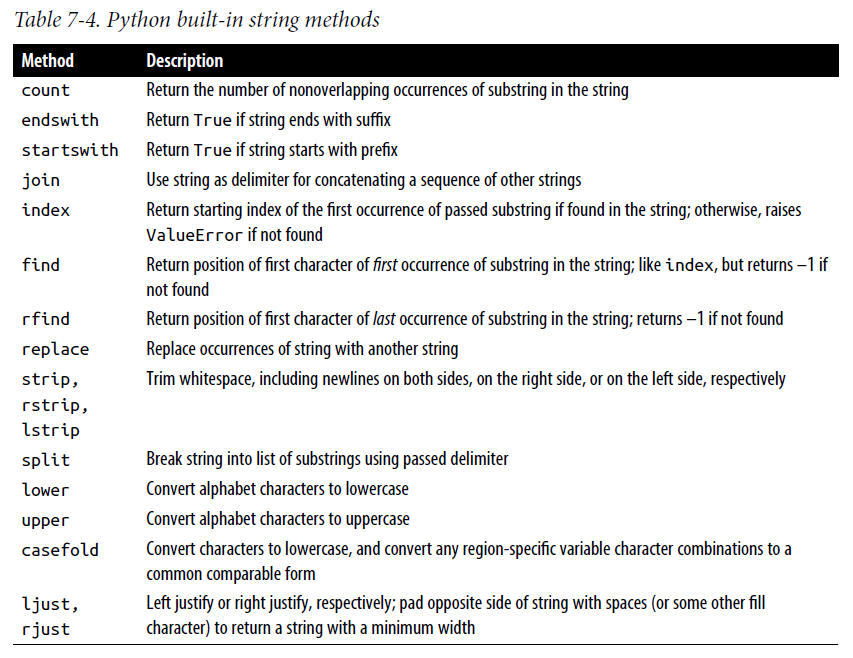

#### Expressões Regulares

Expressões regulares, também conhecidas como "regex" ou "regexp", são uma poderosa ferramenta para manipulação de strings em Python (e em muitas outras linguagens de programação). As expressões regulares permitem realizar pesquisa, correspondência e manipulação de padrões de texto complexos de maneira eficiente. O módulo re do Python é amplamente utilizado para trabalhar com expressões regulares. Aqui estão alguns conceitos importantes relacionados a expressões regulares em Python:


* 1 - Padrões de Correspondência:

As expressões regulares são usadas para especificar padrões de texto que você deseja encontrar em uma string. Por exemplo, você pode usar uma expressão regular para encontrar todas as ocorrências de endereços de e-mail em um texto.

* 2 - Módulo re:

O módulo re é a biblioteca padrão do Python para trabalhar com expressões regulares. Ele fornece funções e classes para compilar e usar expressões regulares.


* 3 - Funções Principais do Módulo re:

re.match(): Verifica se o padrão ocorre no início da string.

re.search(): Procura por qualquer local onde o padrão ocorre na string.

re.findall(): Retorna todas as ocorrências do padrão na string.

re.finditer(): Retorna um iterador de todas as correspondências do padrão na string.

re.sub(): Substitui todas as ocorrências do padrão por outra string.

* 4 - Padrões Básicos:

Os padrões de expressões regulares podem incluir caracteres literais (como letras e números) e caracteres especiais que têm significados especiais (por exemplo, . para qualquer caractere, * para zero ou mais ocorrências, [ ] para especificar um conjunto de caracteres, etc.).


* 5 - Caracteres de Escape:

Se você precisar corresponder a caracteres especiais como ., *, [, ], etc., como literais, é necessário escapá-los usando a barra invertida \.


* 6 - Exemplos de Expressões Regulares:

Alguns exemplos de padrões de expressões regulares comuns incluem:

  \d+: Corresponde a um ou mais dígitos.

  [A-Za-z]+: Corresponde a uma ou mais letras maiúsculas ou minúsculas.

  .*: Corresponde a qualquer sequência de caracteres.

  \b\w+\b: Corresponde a palavras completas em uma string.

  [0-9]{2,4}: Corresponde a um número que tem de 2 a 4 dígitos.

* 7 - Exemplo de Uso:

Aqui está um exemplo simples de uso do módulo re para encontrar endereços de e-mail em uma string:

In [ ]:
import re

texto = "Meu email é joao@exemplo.com e o outro é maria@exemplo.org"
padrao = r'\S+@\S+'

emails = re.findall(padrao, texto)
print(emails)

['joao@exemplo.com', 'maria@exemplo.org']


* 8 - O módulo re permite usar flags para modificar o comportamento das expressões regulares. Por exemplo, a flag re.IGNORECASE torna a correspondência de texto maiúsculo/minúsculo insensível.

Expressões regulares podem ser incrivelmente úteis para análise de texto, validação de entradas, extração de informações e muito mais. No entanto, elas também podem ser complexas e difíceis de ler. Portanto, é aconselhável estudar e praticar expressões regulares para aproveitar ao máximo essa poderosa ferramenta.


####  Funções de Strings em Pandas

O Pandas oferece uma variedade de funções para manipulação de strings em DataFrames. Essas funções são extremamente úteis quando você precisa trabalhar com dados de texto em colunas de um DataFrame. Aqui estão algumas das funções de string mais comuns em Pandas, juntamente com exemplos:

* 1-  str.lower() e str.upper():

Converte todos os caracteres para minúsculas ou maiúsculas, respectivamente.
Exemplo:

In [ ]:
import pandas as pd

data = {'Nome': ['Alice', 'Bob', 'Carol', 'David'],
        'Cidade': ['New York', 'Los Angeles', 'San Francisco', 'Chicago']}
df = pd.DataFrame(data)

df['Cidade'] = df['Cidade'].str.lower()
print(df)

    Nome         Cidade
0  Alice       new york
1    Bob    los angeles
2  Carol  san francisco
3  David        chicago


* 2 - str.len():



In [ ]:
df['Tamanho do Nome'] = df['Nome'].str.len()
print(df)

    Nome         Cidade  Tamanho do Nome
0  Alice       new york                5
1    Bob    los angeles                3
2  Carol  san francisco                5
3  David        chicago                5


* 3 - str.contains():

Verifica se uma string contém uma determinada substring e retorna uma série de booleanos.

In [ ]:
df['Contém "San"'] = df['Cidade'].str.contains('san', case=False)
print(df)

    Nome         Cidade  Tamanho do Nome  Contém "San"
0  Alice       new york                5         False
1    Bob    los angeles                3         False
2  Carol  san francisco                5          True
3  David        chicago                5         False


* 4 - str.replace():

Substitui uma substring por outra em cada string da coluna.

In [ ]:
df['Cidade'] = df['Cidade'].str.replace(' ', '-') # Substituindo espaço vazio por '-'
print(df)

    Nome         Cidade  Tamanho do Nome  Contém "San"
0  Alice       new-york                5         False
1    Bob    los-angeles                3         False
2  Carol  san-francisco                5          True
3  David        chicago                5         False


* 5 - str.extract():

Extrai informações usando expressões regulares.

In [ ]:
df['Estado'] = df['Cidade'].str.extract(r'([A-Za-z]+)') # é um pouco obscuro ainda, mas futuramente retomaremos expressões regulares
print(df)

    Nome         Cidade  Tamanho do Nome  Contém "San"   Estado
0  Alice       new-york                5         False      new
1    Bob    los-angeles                3         False      los
2  Carol  san-francisco                5          True      san
3  David        chicago                5         False  chicago


### Exercícios

1 - Temos o seguinte banco de dados com valores missing. Preencha os valores faltantes com zeros.

In [ ]:
data = {'A': [1, 2, np.nan, 4, 5],
        'B': [np.nan, 2, 3, np.nan, 5],
        'C': [1, np.nan, 3, 4, np.nan]}

df = pd.DataFrame(data)


# Preencher os valores ausentes com zeros
df_filled = df.fillna(0)

# Exibir o DataFrame com os valores preenchidos
print(df_filled)


     A    B    C
0  1.0  0.0  1.0
1  2.0  2.0  0.0
2  0.0  3.0  3.0
3  4.0  0.0  4.0
4  5.0  5.0  0.0


2 - Novamente, temos um banco de dados com NAs. Conte os valores missing em cada coluna:

In [ ]:
data = {'A': [1, 2, np.nan, 4, 5],
        'B': [np.nan, 2, 3, np.nan, 5],
        'C': [1, np.nan, 3, 4, np.nan]}

df = pd.DataFrame(data)


# Contar os valores ausentes em cada coluna
count_missing = df.isnull().sum()

# Exibir o número de valores ausentes em cada coluna
print(count_missing)

A    1
B    2
C    2
dtype: int64


3 - Remova os dados duplicados do seguinte banco de dados

In [ ]:
data = {'Nome': ['Alice', 'Bob', 'Alice', 'David', 'Eve'],
        'ID': [101, 102, 101, 103, 104]}

df = pd.DataFrame(data)

# Remova as entradas duplicadas com base no número de identificação
df_unique = df.drop_duplicates(subset='ID')

# Exiba o novo DataFrame resultante
print(df_unique)

    Nome   ID
0  Alice  101
1    Bob  102
3  David  103
4    Eve  104


4 - Para o seguinte banco de dados, faça um mapeamento que substitua 'alto' por 3, 'médio' por 2 e 'baixo' por 1. em seguida, utilize esse mapeamento no banco com o método replace

In [ ]:

data = {'Cidade': ['A', 'B', 'C', 'D'],
        'Poluição': ['Alto', 'Médio', 'Baixo', 'Alto']}

df = pd.DataFrame(data)

# Mapeie as representações de texto para valores numéricos
mapeamento = {'Alto': 3, 'Médio': 2, 'Baixo': 1}
df['Poluição'] = df['Poluição'].replace(mapeamento)

# Exiba o DataFrame após a substituição
print(df)

5 - Para o seguinte banco de dados, crie bins de conceitos (i.e. 'A', 'B', etc.) com base na nota dos alunos

In [ ]:

data = {'Nome': ['Alice', 'Bob', 'Carol', 'David', 'Eve'],
        'Nota': [85, 72, 45, 60, 32]}

df = pd.DataFrame(data)

# Defina os intervalos das notas
faixas_etarias = [0, 18, 40, 60, 84, float('inf')]  # Intervalos

# Crie uma nova coluna com as faixas etárias
df['Conceito'] = pd.cut(df['Nota'], bins=faixas_etarias, labels=['E', 'D', 'C', 'B', 'A'])


df



Nome  Nota Conceito
0  Alice    85        A
1    Bob    72        B
2  Carol    45        C
3  David    60        C
4    Eve    32        D

6 - Use a função get_dummies() para criar variáveis dummy a partir da coluna de animais de estimação

In [ ]:
data = {'Nome': ['Alice', 'Bob', 'Carol', 'David', 'Eve'],
        'Animal_de_Estimação': ['Cachorro', 'Gato', 'Peixe', 'Gato', 'Cachorro']}

df = pd.DataFrame(data)

# Crie variáveis dummy para o tipo de animal de estimação
df_dummies = pd.get_dummies(df['Animal_de_Estimação'])

# Concatene as variáveis dummy com o DataFrame original
df = pd.concat([df, df_dummies], axis=1)

# Exiba o DataFrame com as novas variáveis dummy
print(df)

    Nome Animal_de_Estimação  Cachorro  Gato  Peixe
0  Alice            Cachorro         1     0      0
1    Bob                Gato         0     1      0
2  Carol               Peixe         0     0      1
3  David                Gato         0     1      0
4    Eve            Cachorro         1     0      0


7 - Suponha que você tenha um DataFrame com uma coluna que contém nomes completos no formato "Primeiro Nome Último Nome". Sua tarefa é dividir essa coluna em duas colunas separadas, uma para o primeiro nome e outra para o último nome.

In [ ]:
import pandas as pd

data = {'Nome_Completo': ['Alice Johnson', 'Bob Smith', 'Carol Brown', 'David White', 'Eve Anderson']}

df = pd.DataFrame(data)

# Divida a coluna "Nome_Completo" em "Primeiro_Nome" e "Último_Nome"
df[['Primeiro_Nome', 'Último_Nome']] = df['Nome_Completo'].str.split(' ', 1, expand=True)

# Exiba o DataFrame com as novas colunas
print(df)

   Nome_Completo Primeiro_Nome Último_Nome
0  Alice Johnson         Alice     Johnson
1      Bob Smith           Bob       Smith
2    Carol Brown         Carol       Brown
3    David White         David       White
4   Eve Anderson           Eve    Anderson


<ipython-input-276-012c5b8ebb7e>:8: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df[['Primeiro_Nome', 'Último_Nome']] = df['Nome_Completo'].str.split(' ', 1, expand=True)


8 - Suponha que você tenha um DataFrame com uma coluna que contém nomes completos, mas alguns nomes têm espaços em branco extras no início ou no final. Sua tarefa é remover esses espaços em branco extras.

In [ ]:
data = {'Nome_Completo': ['   Alice Johnson', 'Bob Smith   ', ' Carol Brown ', '  David White ', 'Eve  Anderson']}

df = pd.DataFrame(data)

# Remova espaços em branco extras no início e no final dos nomes
df['Nome_Completo'] = df['Nome_Completo'].str.strip()

# Exiba o DataFrame com os nomes limpos
print(df)

   Nome_Completo
0  Alice Johnson
1      Bob Smith
2    Carol Brown
3    David White
4  Eve  Anderson
